Clipping occurrence_130W_40Nv1_4_2021.tif successful.
Clipping occurrence_120W_50Nv1_4_2021.tif successful.
Clipping occurrence_120W_40Nv1_4_2021.tif successful.
Clipping occurrence_110W_50Nv1_4_2021.tif successful.
Clipping occurrence_110W_40Nv1_4_2021.tif successful.
Clipping occurrence_110W_30Nv1_4_2021.tif successful.
Clipping occurrence_100W_50Nv1_4_2021.tif successful.
Clipping occurrence_100W_40Nv1_4_2021.tif successful.
Error clipping occurrence_100W_30Nv1_4_2021.tif: C:\vcpkg\buildtrees\gdal\src\v3.9.3-e3a570b154.clean\alg\gdalrasterize.cpp, 1141: cannot allocate 1651840000 bytes
Error clipping occurrence_90W_50Nv1_4_2021.tif: C:\vcpkg\buildtrees\gdal\src\v3.9.3-e3a570b154.clean\alg\gdalrasterize.cpp, 1141: cannot allocate 1651840000 bytes
Error clipping occurrence_90W_40Nv1_4_2021.tif: C:\vcpkg\buildtrees\gdal\src\v3.9.3-e3a570b154.clean\alg\gdalrasterize.cpp, 1141: cannot allocate 1651840000 bytes
Error clipping occurrence_90W_30Nv1_4_2021.tif: C:\vcpkg\buildtrees\gdal\src\v

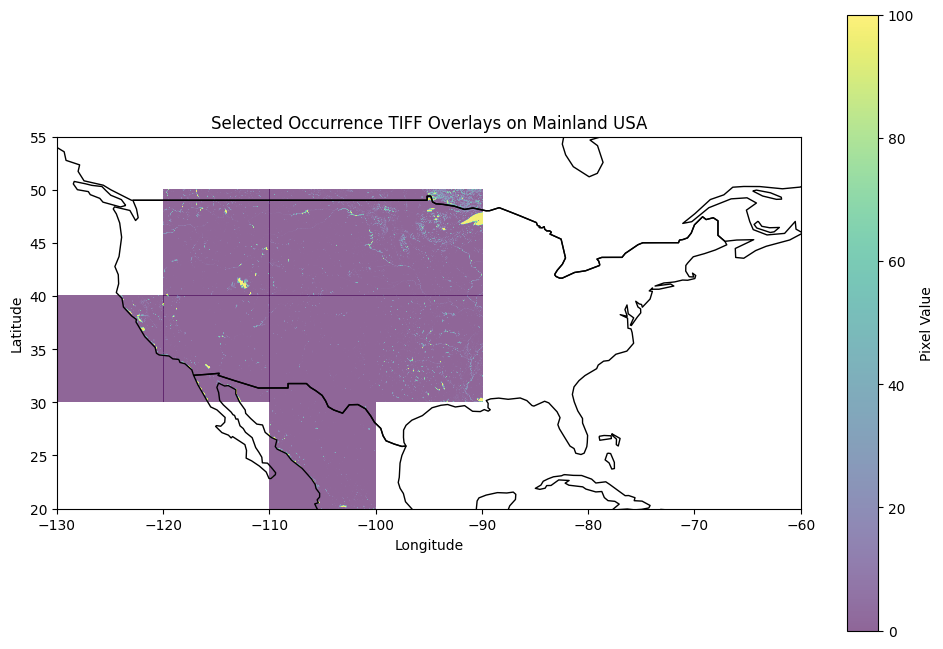

In [1]:
import rasterio
from rasterio.mask import mask
from rasterio.enums import Resampling
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
tif_folder_path = 'C:/Users/rubab/Desktop/GWE_codes/AncillaryWaterData/downloads_ancillary_downloadWaterData_PythonV3_2021'
shapefile_path = r'C:\Users\rubab\Desktop\GWE_codes\WaterTable_dataUSGS\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp'  # Update to actual path

# List of specific TIFF filenames
selected_tifs = [
    "occurrence_130W_40Nv1_4_2021.tif", "occurrence_120W_50Nv1_4_2021.tif", "occurrence_120W_40Nv1_4_2021.tif",
    "occurrence_110W_50Nv1_4_2021.tif", "occurrence_110W_40Nv1_4_2021.tif", "occurrence_110W_30Nv1_4_2021.tif",
    "occurrence_100W_50Nv1_4_2021.tif", "occurrence_100W_40Nv1_4_2021.tif", "occurrence_100W_30Nv1_4_2021.tif",
    "occurrence_90W_50Nv1_4_2021.tif", "occurrence_90W_40Nv1_4_2021.tif", "occurrence_90W_30Nv1_4_2021.tif",
    "occurrence_80W_50Nv1_4_2021.tif", "occurrence_80W_40Nv1_4_2021.tif", "occurrence_130W_50Nv1_4_2021.tif"
]

# Load mainland U.S. shapefile and ensure WGS84 (EPSG:4326)
usa_shape = gpd.read_file(shapefile_path)
if usa_shape.crs != 'EPSG:4326':
    usa_shape = usa_shape.to_crs('EPSG:4326')

# Plot mainland U.S.
fig, ax = plt.subplots(figsize=(12, 8))
usa_shape.boundary.plot(ax=ax, edgecolor="black", linewidth=1)
plt.title("Selected Occurrence TIFF Overlays on Mainland USA")
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Process each TIFF file
for tif_path in [Path(tif_folder_path) / tif_name for tif_name in selected_tifs]:
    with rasterio.open(tif_path) as src:
        # Downsample and read with memory map
        downsample_factor = 2  # Adjust factor as needed
        data = src.read(
            out_shape=(src.count, int(src.height / downsample_factor), int(src.width / downsample_factor)),
            resampling=Resampling.bilinear
        )
        transform = src.transform * src.transform.scale(downsample_factor, downsample_factor)

        # Clip to mainland U.S.
        usa_geometry = [feature["geometry"] for feature in usa_shape.__geo_interface__["features"]]
        try:
            clipped_data, clipped_transform = mask(src, usa_geometry, crop=True, nodata=0)
            print(f"Clipping {tif_path.name} successful.")
        except Exception as e:
            print(f"Error clipping {tif_path.name}: {e}")
            continue

        # Plot the clipped raster data
        extent = [
            clipped_transform[2],  # Left
            clipped_transform[2] + clipped_transform[0] * clipped_data.shape[2],  # Right
            clipped_transform[5] + clipped_transform[4] * clipped_data.shape[1],  # Bottom
            clipped_transform[5]  # Top
        ]
        plt.imshow(clipped_data[0], cmap='viridis', extent=extent, alpha=0.6)

# Show plot with color bar
plt.colorbar(label='Pixel Value')
plt.show()


Processing: seasonality_100W_20Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-100.0, bottom=10.0, right=-90.0, top=20.0)
Width, Height: 40000 40000
Number of Bands: 1


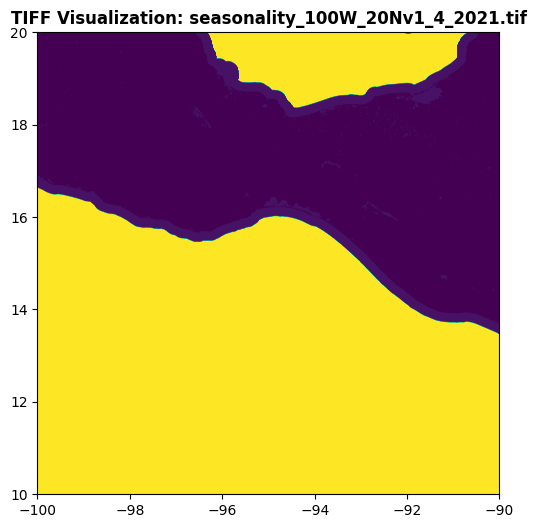

Processing: seasonality_100W_30Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-100.0, bottom=20.0, right=-90.0, top=30.0)
Width, Height: 40000 40000
Number of Bands: 1


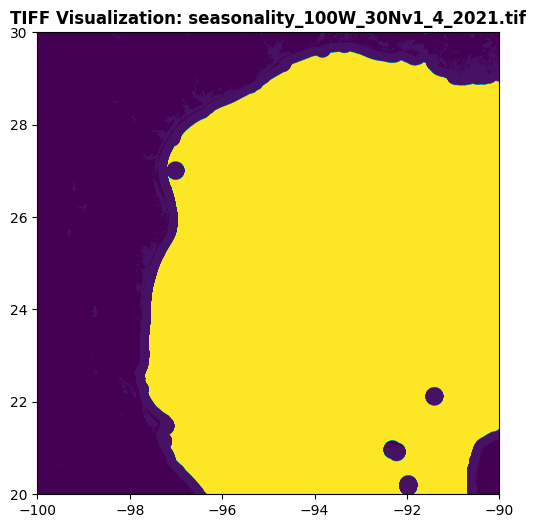

Processing: seasonality_100W_40Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-100.0, bottom=30.0, right=-90.0, top=40.0)
Width, Height: 40000 40000
Number of Bands: 1


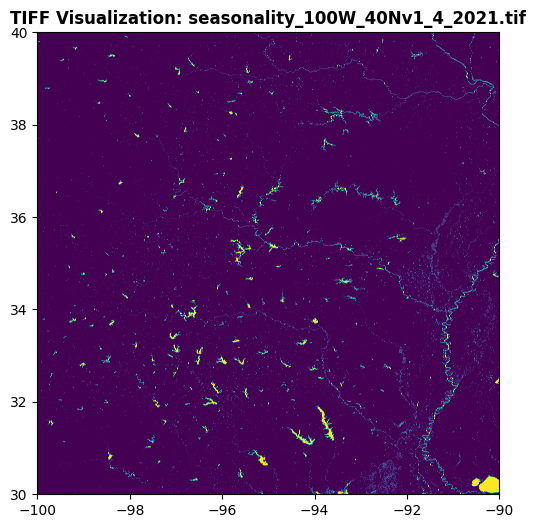

Processing: seasonality_100W_50Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-100.0, bottom=40.0, right=-90.0, top=50.0)
Width, Height: 40000 40000
Number of Bands: 1


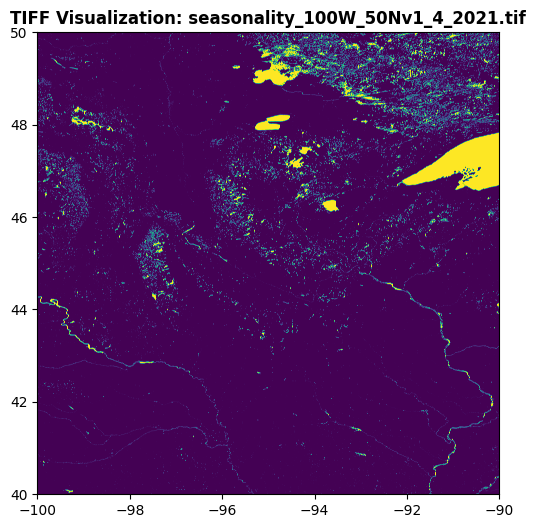

Processing: seasonality_110W_20Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-110.0, bottom=10.0, right=-100.0, top=20.0)
Width, Height: 40000 40000
Number of Bands: 1


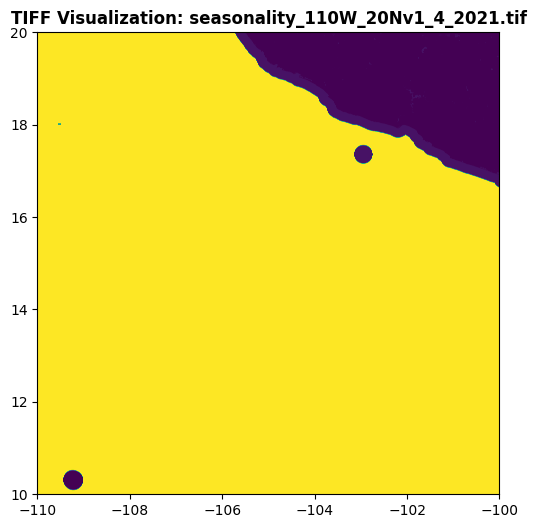

Processing: seasonality_110W_30Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-110.0, bottom=20.0, right=-100.0, top=30.0)
Width, Height: 40000 40000
Number of Bands: 1


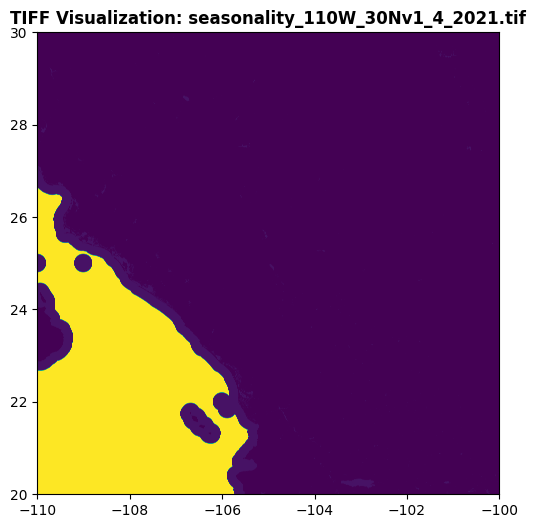

Processing: seasonality_110W_40Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-110.0, bottom=30.0, right=-100.0, top=40.0)
Width, Height: 40000 40000
Number of Bands: 1


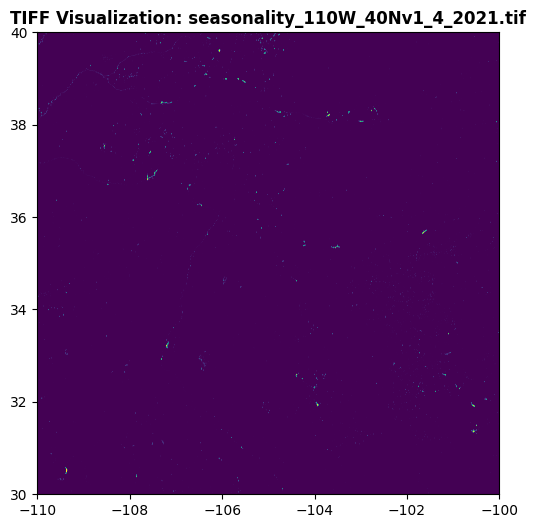

Processing: seasonality_110W_50Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-110.0, bottom=40.0, right=-100.0, top=50.0)
Width, Height: 40000 40000
Number of Bands: 1


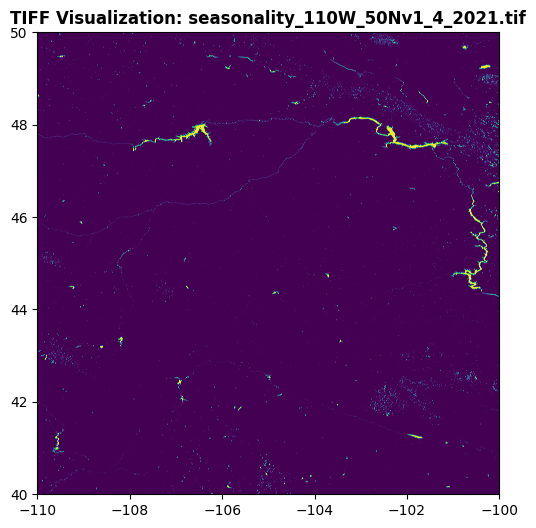

Processing: seasonality_120W_20Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-120.0, bottom=10.0, right=-110.0, top=20.0)
Width, Height: 40000 40000
Number of Bands: 1


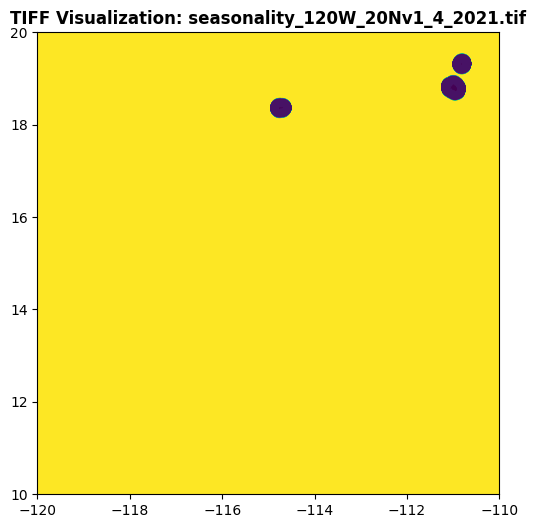

Processing: seasonality_120W_30Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-120.0, bottom=20.0, right=-110.0, top=30.0)
Width, Height: 40000 40000
Number of Bands: 1


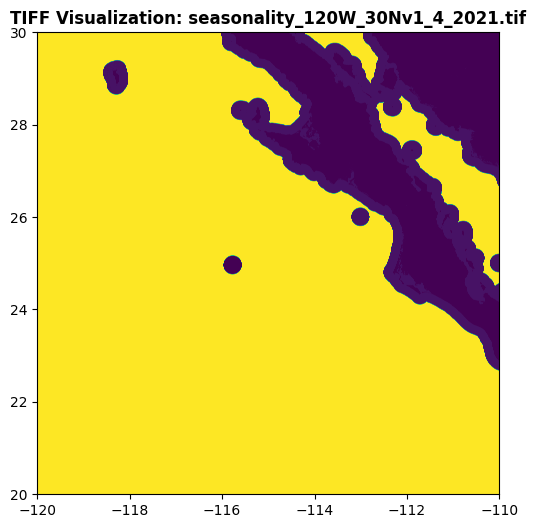

Processing: seasonality_120W_40Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-120.0, bottom=30.0, right=-110.0, top=40.0)
Width, Height: 40000 40000
Number of Bands: 1


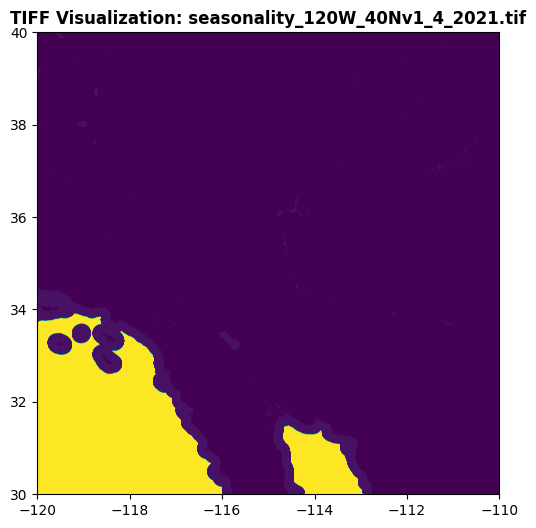

Processing: seasonality_120W_50Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-120.0, bottom=40.0, right=-110.0, top=50.0)
Width, Height: 40000 40000
Number of Bands: 1


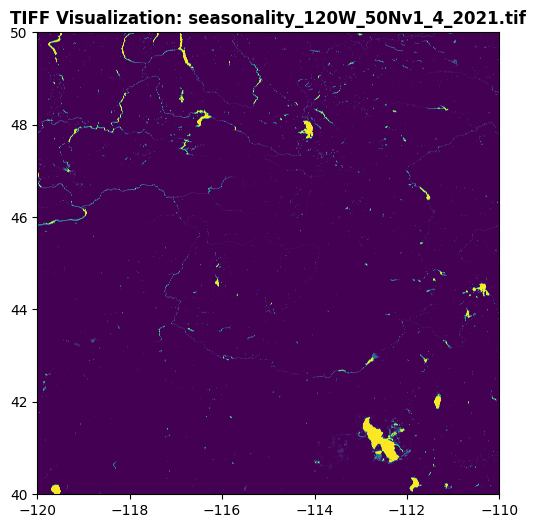

Processing: seasonality_130W_20Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-130.0, bottom=10.0, right=-120.0, top=20.0)
Width, Height: 40000 40000
Number of Bands: 1


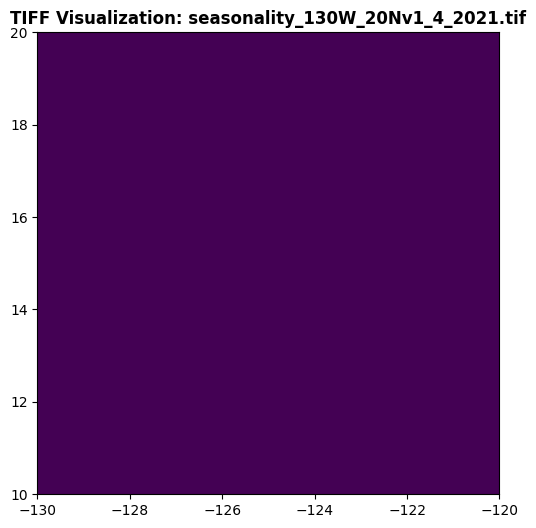

Processing: seasonality_130W_30Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-130.0, bottom=20.0, right=-120.0, top=30.0)
Width, Height: 40000 40000
Number of Bands: 1


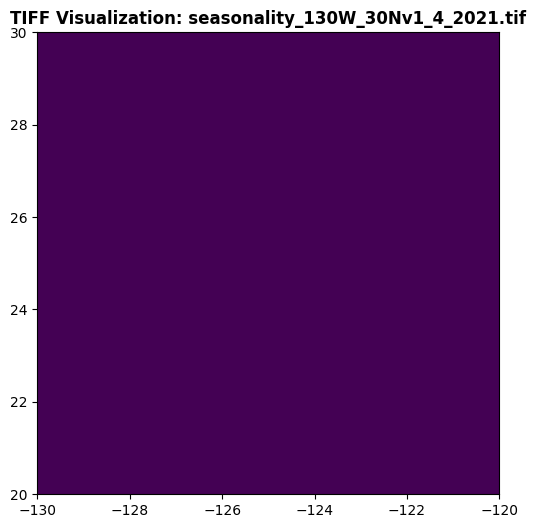

Processing: seasonality_130W_40Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-130.0, bottom=30.0, right=-120.0, top=40.0)
Width, Height: 40000 40000
Number of Bands: 1


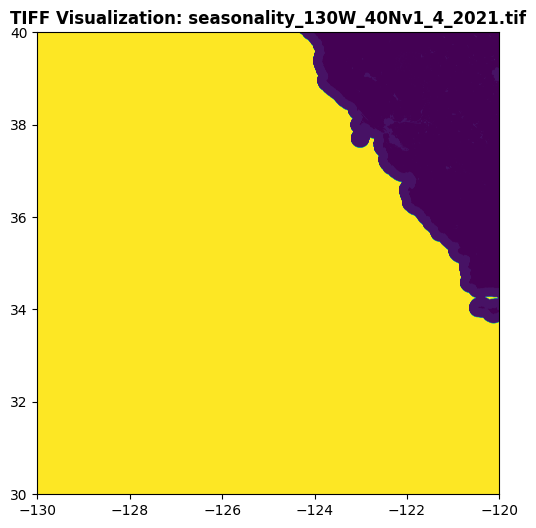

Processing: seasonality_130W_50Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-130.0, bottom=40.0, right=-120.0, top=50.0)
Width, Height: 40000 40000
Number of Bands: 1


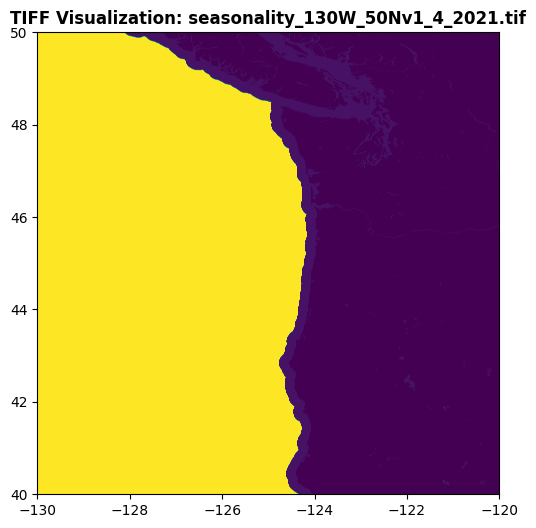

Processing: seasonality_70W_50Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-70.0, bottom=40.0, right=-60.0, top=50.0)
Width, Height: 40000 40000
Number of Bands: 1


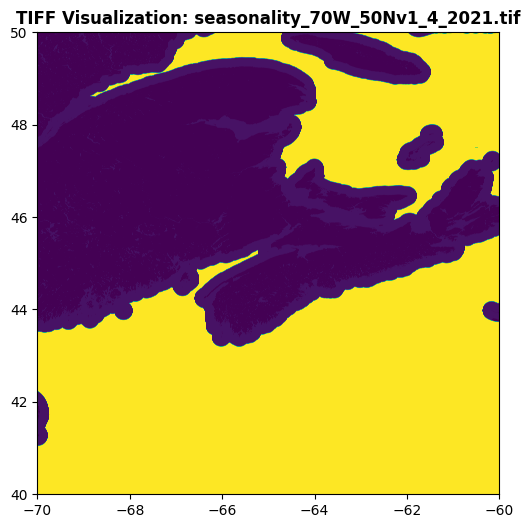

Processing: seasonality_80W_20Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-80.0, bottom=10.0, right=-70.0, top=20.0)
Width, Height: 40000 40000
Number of Bands: 1


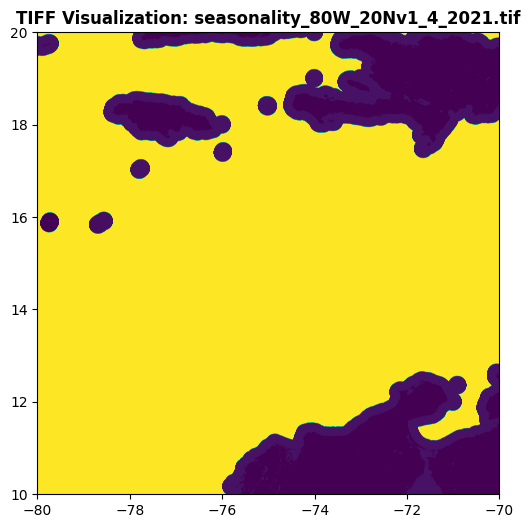

Processing: seasonality_80W_30Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-80.0, bottom=20.0, right=-70.0, top=30.0)
Width, Height: 40000 40000
Number of Bands: 1


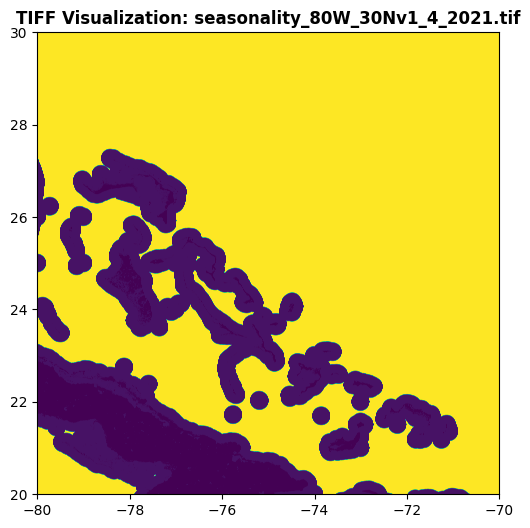

Processing: seasonality_80W_40Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-80.0, bottom=30.0, right=-70.0, top=40.0)
Width, Height: 40000 40000
Number of Bands: 1


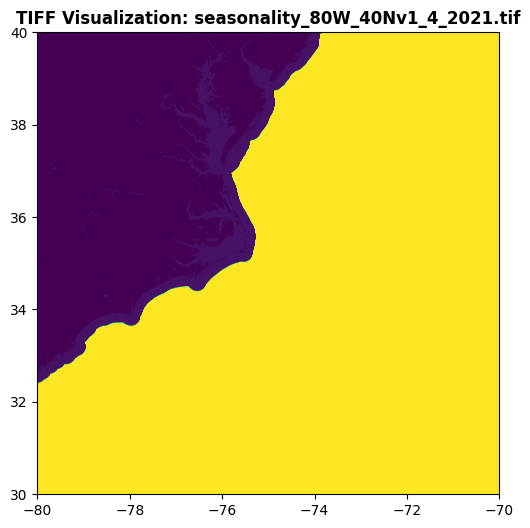

Processing: seasonality_80W_50Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-80.0, bottom=40.0, right=-70.0, top=50.0)
Width, Height: 40000 40000
Number of Bands: 1


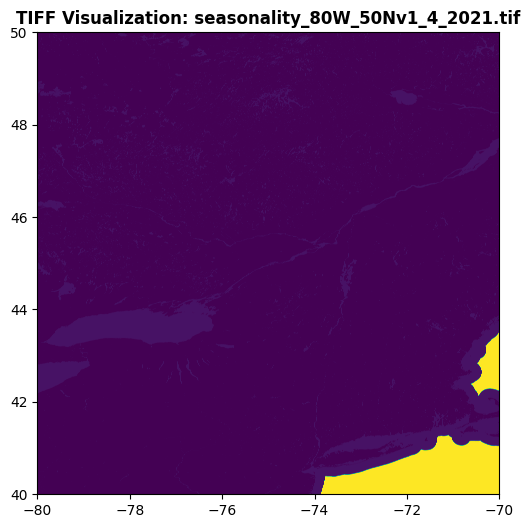

Processing: seasonality_90W_20Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-90.0, bottom=10.0, right=-80.0, top=20.0)
Width, Height: 40000 40000
Number of Bands: 1


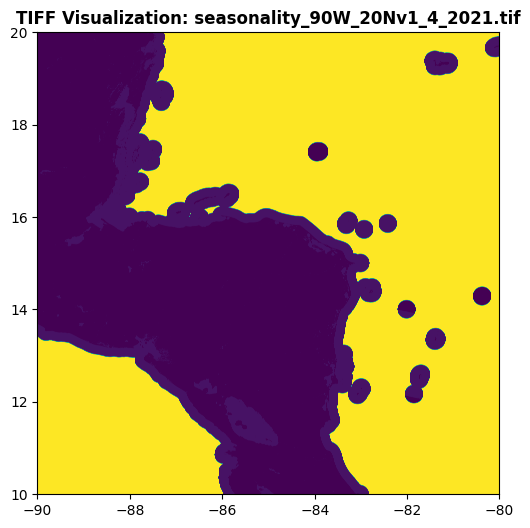

Processing: seasonality_90W_30Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-90.0, bottom=20.0, right=-80.0, top=30.0)
Width, Height: 40000 40000
Number of Bands: 1


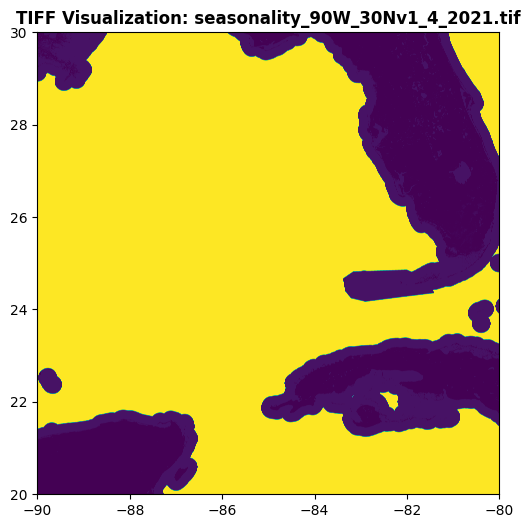

Processing: seasonality_90W_40Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-90.0, bottom=30.0, right=-80.0, top=40.0)
Width, Height: 40000 40000
Number of Bands: 1


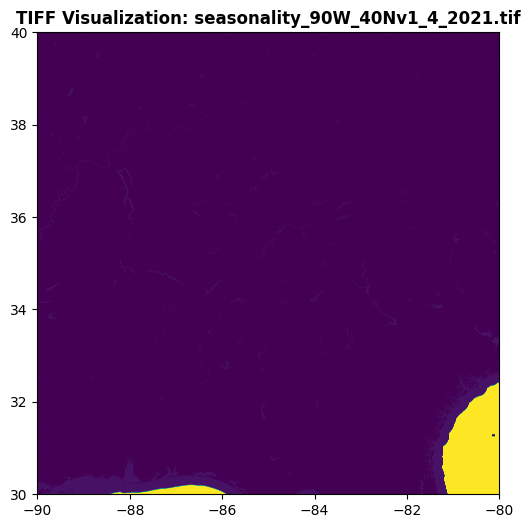

Processing: seasonality_90W_50Nv1_4_2021.tif
CRS: EPSG:4326
Bounds: BoundingBox(left=-90.0, bottom=40.0, right=-80.0, top=50.0)
Width, Height: 40000 40000
Number of Bands: 1


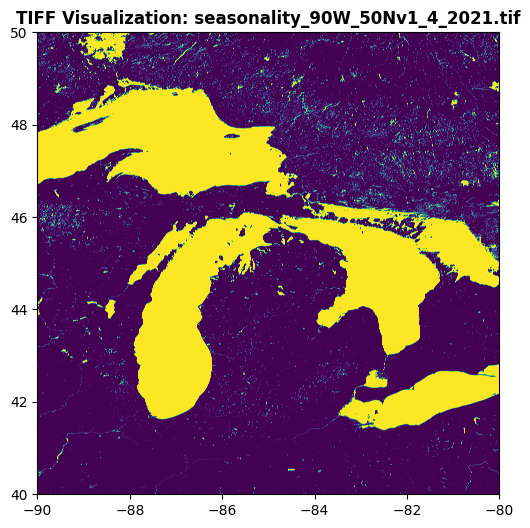

In [3]:
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Directory containing TIFF files
tiff_folder = r"C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\Seasonality"

# Loop through each file in the directory
for filename in os.listdir(tiff_folder):
    if filename.endswith(".tif") or filename.endswith(".tiff"):  # Check for TIFF files
        tiff_path = os.path.join(tiff_folder, filename)
        
        # Open and display the TIFF file
        with rasterio.open(tiff_path) as dataset:
            print(f"Processing: {filename}")
            print("CRS:", dataset.crs)
            print("Bounds:", dataset.bounds)
            print("Width, Height:", dataset.width, dataset.height)
            print("Number of Bands:", dataset.count)
            
            # Display the raster
            fig, ax = plt.subplots(figsize=(10, 6))
            show(dataset, ax=ax, title=f"TIFF Visualization: {filename}")
            plt.show()


Clipping seasonality_130W_40Nv1_4_2021.tif successful.
Clipping seasonality_120W_50Nv1_4_2021.tif successful.
Clipping seasonality_120W_40Nv1_4_2021.tif successful.
Clipping seasonality_110W_50Nv1_4_2021.tif successful.
Clipping seasonality_110W_40Nv1_4_2021.tif successful.
Clipping seasonality_110W_30Nv1_4_2021.tif successful.
Clipping seasonality_100W_50Nv1_4_2021.tif successful.
Clipping seasonality_100W_40Nv1_4_2021.tif successful.
Clipping seasonality_100W_30Nv1_4_2021.tif successful.
Clipping seasonality_90W_50Nv1_4_2021.tif successful.
Clipping seasonality_90W_40Nv1_4_2021.tif successful.
Clipping seasonality_90W_30Nv1_4_2021.tif successful.
Clipping seasonality_80W_50Nv1_4_2021.tif successful.
Clipping seasonality_80W_40Nv1_4_2021.tif successful.
Clipping seasonality_130W_50Nv1_4_2021.tif successful.


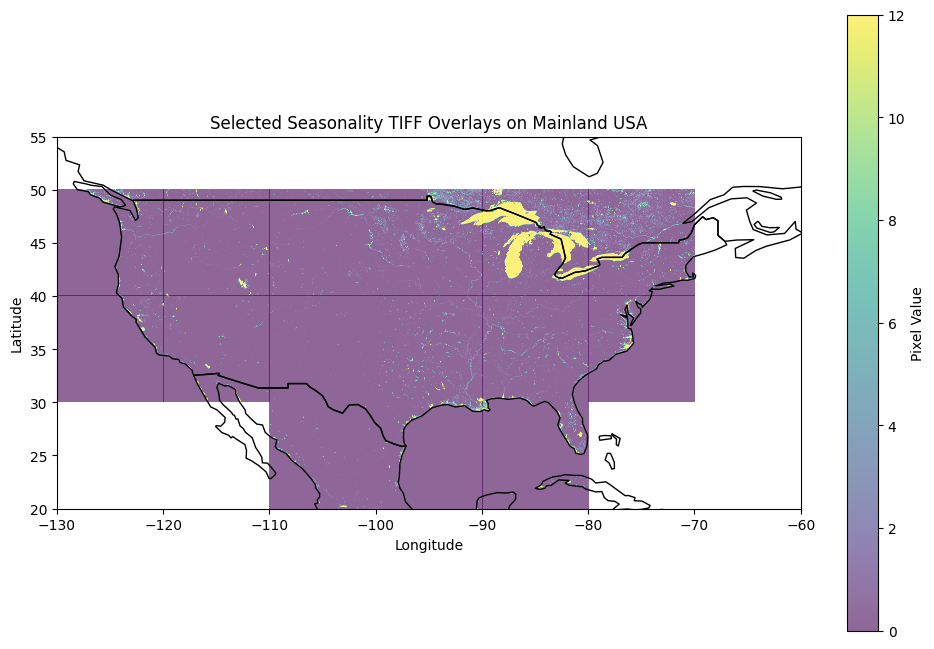

In [8]:
import rasterio
from rasterio.mask import mask
from rasterio.enums import Resampling
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
tif_folder_path = r'C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\Seasonality'
shapefile_path = r'C:\Users\rubab\Desktop\GWE_codes\WaterTable_dataUSGS\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp'  # Update to actual path

# List of specific TIFF filenames
selected_tifs = [
    "seasonality_130W_40Nv1_4_2021.tif", "seasonality_120W_50Nv1_4_2021.tif", "seasonality_120W_40Nv1_4_2021.tif",
    "seasonality_110W_50Nv1_4_2021.tif", "seasonality_110W_40Nv1_4_2021.tif", "seasonality_110W_30Nv1_4_2021.tif",
    "seasonality_100W_50Nv1_4_2021.tif", "seasonality_100W_40Nv1_4_2021.tif", "seasonality_100W_30Nv1_4_2021.tif",
    "seasonality_90W_50Nv1_4_2021.tif", "seasonality_90W_40Nv1_4_2021.tif", "seasonality_90W_30Nv1_4_2021.tif",
    "seasonality_80W_50Nv1_4_2021.tif", "seasonality_80W_40Nv1_4_2021.tif", "seasonality_130W_50Nv1_4_2021.tif"
]

# Load mainland U.S. shapefile and ensure WGS84 (EPSG:4326)
usa_shape = gpd.read_file(shapefile_path)
if usa_shape.crs != 'EPSG:4326':
    usa_shape = usa_shape.to_crs('EPSG:4326')

# Plot mainland U.S.
fig, ax = plt.subplots(figsize=(12, 8))
usa_shape.boundary.plot(ax=ax, edgecolor="black", linewidth=1)
plt.title("Selected Seasonality TIFF Overlays on Mainland USA")
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Process each TIFF file
for tif_path in [Path(tif_folder_path) / tif_name for tif_name in selected_tifs]:
    with rasterio.open(tif_path) as src:
        # Downsample and read with memory map
        downsample_factor = 2  # Adjust factor as needed
        data = src.read(
            out_shape=(src.count, int(src.height / downsample_factor), int(src.width / downsample_factor)),
            resampling=Resampling.bilinear
        )
        transform = src.transform * src.transform.scale(downsample_factor, downsample_factor)

        # Clip to mainland U.S.
        usa_geometry = [feature["geometry"] for feature in usa_shape.__geo_interface__["features"]]
        try:
            clipped_data, clipped_transform = mask(src, usa_geometry, crop=True, nodata=0)
            print(f"Clipping {tif_path.name} successful.")
        except Exception as e:
            print(f"Error clipping {tif_path.name}: {e}")
            continue

        # Plot the clipped raster data
        extent = [
            clipped_transform[2],  # Left
            clipped_transform[2] + clipped_transform[0] * clipped_data.shape[2],  # Right
            clipped_transform[5] + clipped_transform[4] * clipped_data.shape[1],  # Bottom
            clipped_transform[5]  # Top
        ]
        plt.imshow(clipped_data[0], cmap='viridis', extent=extent, alpha=0.6)

# Show plot with color bar
plt.colorbar(label='Pixel Value')
plt.show()


In [15]:
import rasterio
from pathlib import Path
import numpy as np
import os

# Paths
tif_folder_path = 'C:/Users/rubab/Desktop/GWE_codes/AncillaryWaterData/downloads_ancillary_downloadWaterData_PythonV3_2021/Seasonality'
binary_output_folder = 'C:/Users/rubab/Desktop/GWE_codes/binarytiffs_seasonality/'  # Output folder for binary TIFFs

# Create output folder if it doesn't exist
os.makedirs(binary_output_folder, exist_ok=True)

# List of specific TIFF filenames
selected_tifs = [
    "seasonality_130W_40Nv1_4_2021.tif", "seasonality_120W_50Nv1_4_2021.tif", "seasonality_120W_40Nv1_4_2021.tif",
    "seasonality_110W_50Nv1_4_2021.tif", "seasonality_110W_40Nv1_4_2021.tif", "seasonality_110W_30Nv1_4_2021.tif",
    "seasonality_100W_50Nv1_4_2021.tif", "seasonality_100W_40Nv1_4_2021.tif", "seasonality_100W_30Nv1_4_2021.tif",
    "seasonality_90W_50Nv1_4_2021.tif", "seasonality_90W_40Nv1_4_2021.tif", "seasonality_90W_30Nv1_4_2021.tif",
    "seasonality_80W_50Nv1_4_2021.tif", "seasonality_80W_40Nv1_4_2021.tif", "seasonality_130W_50Nv1_4_2021.tif"
]

# Process each TIFF file
for tif_path in [Path(tif_folder_path) / tif_name for tif_name in selected_tifs]:
    try:
        with rasterio.open(tif_path) as src:
            # Read the entire raster
            data = src.read(1)  # Read the first band
            
            # Convert to binary: 1 for seasonality, 0 otherwise
            binary_data = np.where(data > 0, 1, 0).astype('uint8')

            # Save the binary TIFF
            output_path = Path(binary_output_folder) / f"binary_{tif_path.name}"
            with rasterio.open(
                output_path,
                "w",
                driver="GTiff",
                height=binary_data.shape[0],
                width=binary_data.shape[1],
                count=1,  # Single band
                dtype="uint8",  # Binary format
                crs=src.crs,
                transform=src.transform,
            ) as dst:
                dst.write(binary_data, 1)
            print(f"Saved binary TIFF: {output_path}")

    except Exception as e:
        print(f"Error processing {tif_path.name}: {e}")


Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_seasonality\binary_seasonality_130W_40Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_seasonality\binary_seasonality_120W_50Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_seasonality\binary_seasonality_120W_40Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_seasonality\binary_seasonality_110W_50Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_seasonality\binary_seasonality_110W_40Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_seasonality\binary_seasonality_110W_30Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_seasonality\binary_seasonality_100W_50Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_seasonality\binary_seasonality_100W_40Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_

In [13]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
clipped_tiff_folder = r'C:/Users/rubab/Desktop/GWE_codes/Clipped_TIFFs/'  # Folder containing clipped TIFFs
shapefile_path = r'C:/Users/rubab/Desktop/GWE_codes/WaterTable_dataUSGS/ne_110m_admin_0_countries.shp'  # Shapefile path

# Load the shapefile
shapefile = gpd.read_file(shapefile_path)
if shapefile.crs != 'EPSG:4326':
    shapefile = shapefile.to_crs('EPSG:4326')

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 8))
shapefile.boundary.plot(ax=ax, edgecolor="black", linewidth=1, label="Shapefile Boundary")

# Loop through each clipped TIFF and overlay it on the shapefile
for tiff_path in Path(clipped_tiff_folder).glob("*.tif"):
    with rasterio.open(tiff_path) as src:
        # Get raster bounds and plot extent
        data = src.read(1)
        extent = [
            src.bounds.left,
            src.bounds.right,
            src.bounds.bottom,
            src.bounds.top,
        ]
        # Overlay the raster
        ax.imshow(data, cmap='viridis', extent=extent, alpha=0.6, label=f"{tiff_path.name}")

# Add labels and legend
plt.colorbar(ax.imshow(data, cmap='viridis'), ax=ax, label="Pixel Value")
plt.title("Clipped TIFF Files Overlaid on Shapefile")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='upper right')
plt.show()


DataSourceError: C:/Users/rubab/Desktop/GWE_codes/WaterTable_dataUSGS/ne_110m_admin_0_countries.shp: No such file or directory

In [15]:
shapefile_path = r'C:/Users/rubab/Desktop/GWE_codes/WaterTable_dataUSGS/ne_110m_admin_0_countries.shp'

try:
    # Load the shapefile
    shapefile = gpd.read_file(shapefile_path)
    print("Shapefile loaded successfully!")
except FileNotFoundError:
    print(f"Error: The shapefile was not found at the path: {shapefile_path}")
except Exception as e:
    print(f"An error occurred while loading the shapefile: {e}")


An error occurred while loading the shapefile: C:/Users/rubab/Desktop/GWE_codes/WaterTable_dataUSGS/ne_110m_admin_0_countries.shp: No such file or directory


In [10]:
import rasterio
import os
from rasterio.enums import Resampling
from rasterio.windows import from_bounds
from pathlib import Path  # Added import
import numpy as np

# Paths
tif_folder_path = r'C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\Seasonality'
mask_tiff_path = r'C:\Users\rubab\Desktop\GWE_codes\WaterTable_dataUSGS\masked_binary_image_30m.tif'  # Provide mask path
output_folder = r'C:/Users/rubab/Desktop/GWE_codes/Binary_TIFFs_seasonal/'

# Create output folder if not exists
os.makedirs(output_folder, exist_ok=True)

# Read mask TIFF for bounds
with rasterio.open(mask_tiff_path) as mask_src:
    mask_bounds = mask_src.bounds
    print(f"Using mask bounds: {mask_bounds}")

# Process each file
for tif_path in Path(tif_folder_path).glob("*.tif"):
    with rasterio.open(tif_path) as src:
        try:
            # Create a window from mask bounds
            window = from_bounds(
                left=mask_bounds.left,
                bottom=mask_bounds.bottom,
                right=mask_bounds.right,
                top=mask_bounds.top,
                transform=src.transform,
            )

            # Calculate the new shape for the window
            out_height = int((window.height) // 4)  # Corrected calculation
            out_width = int((window.width) // 4)

            # Read data from the window
            data = src.read(
                1,  # First band
                window=window,
                out_shape=(out_height, out_width),
                resampling=Resampling.bilinear,
            )

            transform = src.window_transform(window)

            # Convert to binary (1 for seasonality, 0 otherwise)
            binary_data = np.where(data > 0, 1, 0)  # Adjust threshold if needed

            # Save the binary TIFF
            output_path = Path(output_folder) / f"binary_{tif_path.name}"
            with rasterio.open(
                output_path,
                "w",
                driver="GTiff",
                height=binary_data.shape[0],
                width=binary_data.shape[1],
                count=1,
                dtype="uint8",  # Binary format
                crs=src.crs,
                transform=transform,
            ) as dst:
                dst.write(binary_data, 1)
            print(f"Saved binary TIFF: {output_path}")

        except Exception as e:
            print(f"Error processing {tif_path.name}: {e}")


Using mask bounds: BoundingBox(left=-125.0, bottom=24.5, right=-66.0, top=49.5)
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\Binary_TIFFs_seasonal\binary_seasonality_100W_20Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\Binary_TIFFs_seasonal\binary_seasonality_100W_30Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\Binary_TIFFs_seasonal\binary_seasonality_100W_40Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\Binary_TIFFs_seasonal\binary_seasonality_100W_50Nv1_4_2021.tif


KeyboardInterrupt: 

In [18]:
import rasterio
from pathlib import Path
import numpy as np
import os

# Paths
tif_folder_path = 'C:/Users/rubab/Desktop/GWE_codes/AncillaryWaterData/downloads_ancillary_downloadWaterData_PythonV3_2021'
binary_output_folder = 'C:/Users/rubab/Desktop/GWE_codes/binarytiffs_occurrence/'  # Output folder for binary TIFFs

# Create output folder if it doesn't exist
os.makedirs(binary_output_folder, exist_ok=True)

# List of specific TIFF filenames
selected_tifs = [
    "occurrence_130W_40Nv1_4_2021.tif", "occurrence_120W_50Nv1_4_2021.tif", "occurrence_120W_40Nv1_4_2021.tif",
    "occurrence_110W_50Nv1_4_2021.tif", "occurrence_110W_40Nv1_4_2021.tif", "occurrence_110W_30Nv1_4_2021.tif",
    "occurrence_100W_50Nv1_4_2021.tif", "occurrence_100W_40Nv1_4_2021.tif", "occurrence_100W_30Nv1_4_2021.tif",
    "occurrence_90W_50Nv1_4_2021.tif", "occurrence_90W_40Nv1_4_2021.tif", "occurrence_90W_30Nv1_4_2021.tif",
    "occurrence_80W_50Nv1_4_2021.tif", "occurrence_80W_40Nv1_4_2021.tif", "occurrence_130W_50Nv1_4_2021.tif"
]

# Process each TIFF file
for tif_path in [Path(tif_folder_path) / tif_name for tif_name in selected_tifs]:
    try:
        with rasterio.open(tif_path) as src:
            # Read the entire raster
            data = src.read(1)  # Read the first band
            
            # Convert to binary: 1 for occurrence, 0 otherwise
            binary_data = np.where(data > 0, 1, 0).astype('uint8')

            # Save the binary TIFF
            output_path = Path(binary_output_folder) / f"binary_{tif_path.name}"
            with rasterio.open(
                output_path,
                "w",
                driver="GTiff",
                height=binary_data.shape[0],
                width=binary_data.shape[1],
                count=1,  # Single band
                dtype="uint8",  # Binary format
                crs=src.crs,
                transform=src.transform,
            ) as dst:
                dst.write(binary_data, 1)
            print(f"Saved binary TIFF: {output_path}")

    except Exception as e:
        print(f"Error processing {tif_path.name}: {e}")


Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_occurrence\binary_occurrence_130W_40Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_occurrence\binary_occurrence_120W_50Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_occurrence\binary_occurrence_120W_40Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_occurrence\binary_occurrence_110W_50Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_occurrence\binary_occurrence_110W_40Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_occurrence\binary_occurrence_110W_30Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_occurrence\binary_occurrence_100W_50Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_occurrence\binary_occurrence_100W_40Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_occurrence\binar

In [21]:
import rasterio
from pathlib import Path
import numpy as np
import os
from rasterio.enums import Resampling

# Paths
tif_folder_path = 'C:/Users/rubab/Desktop/GWE_codes/AncillaryWaterData/downloads_ancillary_downloadWaterData_PythonV3_2021'
binary_output_folder = 'C:/Users/rubab/Desktop/GWE_codes/binarytiffs_occurrence/'  # Output folder for binary TIFFs
masked_output_folder = 'C:/Users/rubab/Desktop/GWE_codes/masked_binarytiffs_occurrence/'  # Output folder for masked binary TIFFs
mask_tiff_path = 'C:/Users/rubab/Desktop/GWE_codes/WaterTable_dataUSGS/masked_binary_image_30m.tif'  # Path to masking TIFF

# Create output folders if they don't exist
os.makedirs(binary_output_folder, exist_ok=True)
os.makedirs(masked_output_folder, exist_ok=True)

# List of specific TIFF filenames
selected_tifs = [
    "occurrence_130W_40Nv1_4_2021.tif", "occurrence_120W_50Nv1_4_2021.tif", "occurrence_120W_40Nv1_4_2021.tif",
    "occurrence_110W_50Nv1_4_2021.tif", "occurrence_110W_40Nv1_4_2021.tif", "occurrence_110W_30Nv1_4_2021.tif",
    "occurrence_100W_50Nv1_4_2021.tif", "occurrence_100W_40Nv1_4_2021.tif", "occurrence_100W_30Nv1_4_2021.tif",
    "occurrence_90W_50Nv1_4_2021.tif", "occurrence_90W_40Nv1_4_2021.tif", "occurrence_90W_30Nv1_4_2021.tif",
    "occurrence_80W_50Nv1_4_2021.tif", "occurrence_80W_40Nv1_4_2021.tif", "occurrence_130W_50Nv1_4_2021.tif"
]

# Open the masking TIFF once to use later
with rasterio.open(mask_tiff_path) as mask_src:
    mask_data = mask_src.read(1)  # Read the first band of the mask
    mask_transform = mask_src.transform
    mask_crs = mask_src.crs
    mask_nodata = mask_src.nodata

# Process each TIFF file
for tif_path in [Path(tif_folder_path) / tif_name for tif_name in selected_tifs]:
    try:
        with rasterio.open(tif_path) as src:
            # Read the occurrence TIFF and convert to binary
            data = src.read(1)
            binary_data = np.where(data > 0, 1, 0).astype('uint8')

            # Resample the mask to match the occurrence TIFF
            mask_resampled = np.empty_like(binary_data, dtype='uint8')
            rasterio.warp.reproject(
                source=mask_data,
                destination=mask_resampled,
                src_transform=mask_transform,
                src_crs=mask_crs,
                dst_transform=src.transform,
                dst_crs=src.crs,
                resampling=Resampling.nearest,
            )

            # Apply the mask to the binary data
            masked_binary_data = np.where(mask_resampled == 1, binary_data, 0).astype('uint8')

            # Save the binary TIFF
            binary_output_path = Path(binary_output_folder) / f"binary_{tif_path.name}"
            masked_output_path = Path(masked_output_folder) / f"masked_binary_{tif_path.name}"

            with rasterio.open(
                binary_output_path,
                "w",
                driver="GTiff",
                height=binary_data.shape[0],
                width=binary_data.shape[1],
                count=1,
                dtype="uint8",
                crs=src.crs,
                transform=src.transform,
            ) as dst:
                dst.write(binary_data, 1)

            with rasterio.open(
                masked_output_path,
                "w",
                driver="GTiff",
                height=masked_binary_data.shape[0],
                width=masked_binary_data.shape[1],
                count=1,
                dtype="uint8",
                crs=src.crs,
                transform=src.transform,
            ) as dst:
                dst.write(masked_binary_data, 1)

            print(f"Saved binary TIFF: {binary_output_path}")
            print(f"Saved masked binary TIFF: {masked_output_path}")

    except Exception as e:
        print(f"Error processing {tif_path.name}: {e}")


Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_occurrence\binary_occurrence_130W_40Nv1_4_2021.tif
Saved masked binary TIFF: C:\Users\rubab\Desktop\GWE_codes\masked_binarytiffs_occurrence\masked_binary_occurrence_130W_40Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_occurrence\binary_occurrence_120W_50Nv1_4_2021.tif
Saved masked binary TIFF: C:\Users\rubab\Desktop\GWE_codes\masked_binarytiffs_occurrence\masked_binary_occurrence_120W_50Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_occurrence\binary_occurrence_120W_40Nv1_4_2021.tif
Saved masked binary TIFF: C:\Users\rubab\Desktop\GWE_codes\masked_binarytiffs_occurrence\masked_binary_occurrence_120W_40Nv1_4_2021.tif
Saved binary TIFF: C:\Users\rubab\Desktop\GWE_codes\binarytiffs_occurrence\binary_occurrence_110W_50Nv1_4_2021.tif
Saved masked binary TIFF: C:\Users\rubab\Desktop\GWE_codes\masked_binarytiffs_occurrence\masked_binary_occurrence_110W_50Nv1_4_2021.

Processing rasters chunk by chunk...
Processing binary_seasonality_100W_30Nv1_4_2021.tif and binary_occurrence_100W_30Nv1_4_2021.tif
Processing binary_seasonality_100W_40Nv1_4_2021.tif and binary_occurrence_100W_40Nv1_4_2021.tif
Processing binary_seasonality_100W_50Nv1_4_2021.tif and binary_occurrence_100W_50Nv1_4_2021.tif
Processing binary_seasonality_110W_30Nv1_4_2021.tif and binary_occurrence_110W_30Nv1_4_2021.tif
Processing binary_seasonality_110W_40Nv1_4_2021.tif and binary_occurrence_110W_40Nv1_4_2021.tif
Processing binary_seasonality_110W_50Nv1_4_2021.tif and binary_occurrence_110W_50Nv1_4_2021.tif
Processing binary_seasonality_120W_40Nv1_4_2021.tif and binary_occurrence_120W_40Nv1_4_2021.tif
Processing binary_seasonality_120W_50Nv1_4_2021.tif and binary_occurrence_120W_50Nv1_4_2021.tif
Processing binary_seasonality_130W_40Nv1_4_2021.tif and binary_occurrence_130W_40Nv1_4_2021.tif
Processing binary_seasonality_130W_50Nv1_4_2021.tif and binary_occurrence_130W_50Nv1_4_2021.tif
Pro

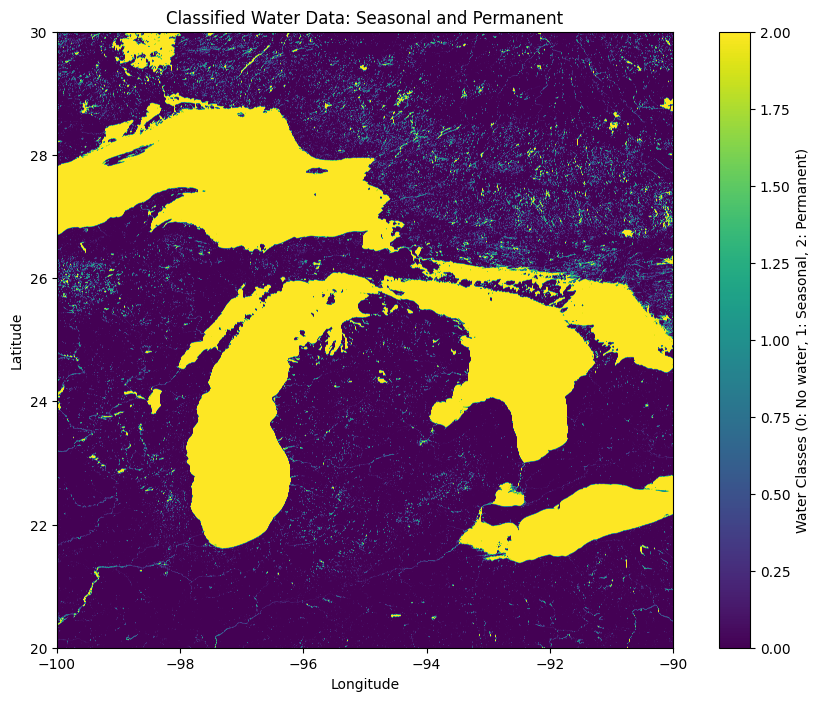

In [23]:
import numpy as np
import rasterio as rio
from rasterio.enums import Resampling
from pathlib import Path
import matplotlib.pyplot as plt

# Paths
seasonality_folder = Path(r'C:/Users/rubab/Desktop/GWE_codes/binarytiffs_seasonality')
occurrence_folder = Path(r'C:/Users/rubab/Desktop/GWE_codes/binarytiffs_occurrence')

def process_in_chunks(seasonality_folder, occurrence_folder):
    # Get the list of files
    seasonality_files = sorted(list(seasonality_folder.glob("*.tif")))
    occurrence_files = sorted(list(occurrence_folder.glob("*.tif")))
    
    # Check for mismatches
    if len(seasonality_files) != len(occurrence_files):
        print(f"Mismatch in files: {len(seasonality_files)} seasonality files, {len(occurrence_files)} occurrence files.")
        print("Seasonality files:", [f.name for f in seasonality_files])
        print("Occurrence files:", [f.name for f in occurrence_files])
        return None

    # Initialize variables for visualization
    combined_image = None
    combined_transform = None
    metadata = None

    print("Processing rasters chunk by chunk...")

    # Process each file pair
    for seasonality_file, occurrence_file in zip(seasonality_files, occurrence_files):
        print(f"Processing {seasonality_file.name} and {occurrence_file.name}")
        with rio.open(seasonality_file) as season_src, rio.open(occurrence_file) as occ_src:
            # Ensure CRS and dimensions match
            if season_src.crs != occ_src.crs or season_src.shape != occ_src.shape:
                print(f"Resampling {occurrence_file.name} to match {seasonality_file.name}")
                occurrence_data = occ_src.read(
                    1, 
                    out_shape=(season_src.height, season_src.width),
                    resampling=Resampling.bilinear,
                )
            else:
                occurrence_data = occ_src.read(1)

            # Initialize combined image metadata and array
            if combined_image is None:
                combined_image = np.zeros(season_src.shape, dtype="uint8")
                combined_transform = season_src.transform
                metadata = season_src.meta.copy()

            # Read seasonality data
            seasonality_data = season_src.read(1)

            # Classify data: 0 for no water, 1 for seasonal, 2 for permanent
            combined_image[seasonality_data > 0] = 1  # Seasonal water
            combined_image[occurrence_data > 0] = 2  # Permanent water
            combined_image[
                (seasonality_data == 0) & (occurrence_data == 0)
            ] = 0  # No water

    return combined_image, combined_transform

# Call the function
result = process_in_chunks(seasonality_folder, occurrence_folder)

if result:
    combined_image, combined_transform = result
    # Visualization
    print("Visualizing combined water data...")
    plt.figure(figsize=(12, 8))
    plt.imshow(combined_image, cmap="viridis", extent=[
        combined_transform[2],  # Left
        combined_transform[2] + combined_transform[0] * combined_image.shape[1],  # Right
        combined_transform[5] + combined_transform[4] * combined_image.shape[0],  # Bottom
        combined_transform[5],  # Top
    ])
    plt.colorbar(label="Water Classes (0: No water, 1: Seasonal, 2: Permanent)")
    plt.title("Classified Water Data: Seasonal and Permanent")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
else:
    print("Processing could not be completed due to file mismatches.")


In [25]:
import numpy as np
import rasterio as rio
from rasterio.enums import Resampling
from rasterio.windows import Window
from pathlib import Path
import os

# Paths
seasonality_folder = Path(r'C:/Users/rubab/Desktop/GWE_codes/binarytiffs_seasonality')
occurrence_folder = Path(r'C:/Users/rubab/Desktop/GWE_codes/binarytiffs_occurrence')
output_folder = Path(r'C:/Users/rubab/Desktop/GWE_codes/classified_tiffs')

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

def process_and_save_tiffs_in_chunks(seasonality_folder, occurrence_folder, output_folder, chunk_size=1000):
    # Get the list of files
    seasonality_files = sorted(list(seasonality_folder.glob("*.tif")))
    occurrence_files = sorted(list(occurrence_folder.glob("*.tif")))
    
    # Check for mismatches
    if len(seasonality_files) != len(occurrence_files):
        print(f"Mismatch in files: {len(seasonality_files)} seasonality files, {len(occurrence_files)} occurrence files.")
        print("Seasonality files:", [f.name for f in seasonality_files])
        print("Occurrence files:", [f.name for f in occurrence_files])
        return None

    print("Processing rasters and saving classified outputs...")

    # Process each file pair
    for seasonality_file, occurrence_file in zip(seasonality_files, occurrence_files):
        print(f"Processing {seasonality_file.name} and {occurrence_file.name}")
        with rio.open(seasonality_file) as season_src, rio.open(occurrence_file) as occ_src:
            # Ensure CRS and dimensions match
            if season_src.crs != occ_src.crs or season_src.shape != occ_src.shape:
                print(f"Resampling {occurrence_file.name} to match {seasonality_file.name}")
                occurrence_data = occ_src.read(
                    1, 
                    out_shape=(season_src.height, season_src.width),
                    resampling=Resampling.bilinear,
                )
            else:
                occurrence_data = occ_src.read(1)

            # Metadata and setup for output
            metadata = season_src.meta.copy()
            metadata.update({
                "count": 1,
                "dtype": "uint8",
                "compress": "lzw"
            })
            output_path = output_folder / f"classified_{seasonality_file.name}"

            with rio.open(output_path, "w", **metadata) as dst:
                for i in range(0, season_src.height, chunk_size):
                    for j in range(0, season_src.width, chunk_size):
                        # Define window
                        window = Window(j, i, chunk_size, chunk_size)
                        
                        # Read seasonality and occurrence data for the window
                        seasonality_chunk = season_src.read(1, window=window)
                        occurrence_chunk = occ_src.read(1, window=window)

                        # Classify data: 0 for no water, 1 for seasonal, 2 for permanent
                        classified_chunk = np.zeros(seasonality_chunk.shape, dtype="uint8")
                        classified_chunk[seasonality_chunk > 0] = 1  # Seasonal water
                        classified_chunk[occurrence_chunk > 0] = 2  # Permanent water
                        classified_chunk[
                            (seasonality_chunk == 0) & (occurrence_chunk == 0)
                        ] = 0  # No water

                        # Write classified chunk to output
                        dst.write(classified_chunk, 1, window=window)

            print(f"Saved classified TIFF: {output_path}")

# Call the function
process_and_save_tiffs_in_chunks(seasonality_folder, occurrence_folder, output_folder, chunk_size=1000)


Processing rasters and saving classified outputs...
Processing binary_seasonality_100W_30Nv1_4_2021.tif and binary_occurrence_100W_30Nv1_4_2021.tif
Saved classified TIFF: C:\Users\rubab\Desktop\GWE_codes\classified_tiffs\classified_binary_seasonality_100W_30Nv1_4_2021.tif
Processing binary_seasonality_100W_40Nv1_4_2021.tif and binary_occurrence_100W_40Nv1_4_2021.tif
Saved classified TIFF: C:\Users\rubab\Desktop\GWE_codes\classified_tiffs\classified_binary_seasonality_100W_40Nv1_4_2021.tif
Processing binary_seasonality_100W_50Nv1_4_2021.tif and binary_occurrence_100W_50Nv1_4_2021.tif
Saved classified TIFF: C:\Users\rubab\Desktop\GWE_codes\classified_tiffs\classified_binary_seasonality_100W_50Nv1_4_2021.tif
Processing binary_seasonality_110W_30Nv1_4_2021.tif and binary_occurrence_110W_30Nv1_4_2021.tif
Saved classified TIFF: C:\Users\rubab\Desktop\GWE_codes\classified_tiffs\classified_binary_seasonality_110W_30Nv1_4_2021.tif
Processing binary_seasonality_110W_40Nv1_4_2021.tif and binary_o

Clipping seasonality_70W_50Nv1_4_2021.tif successful.


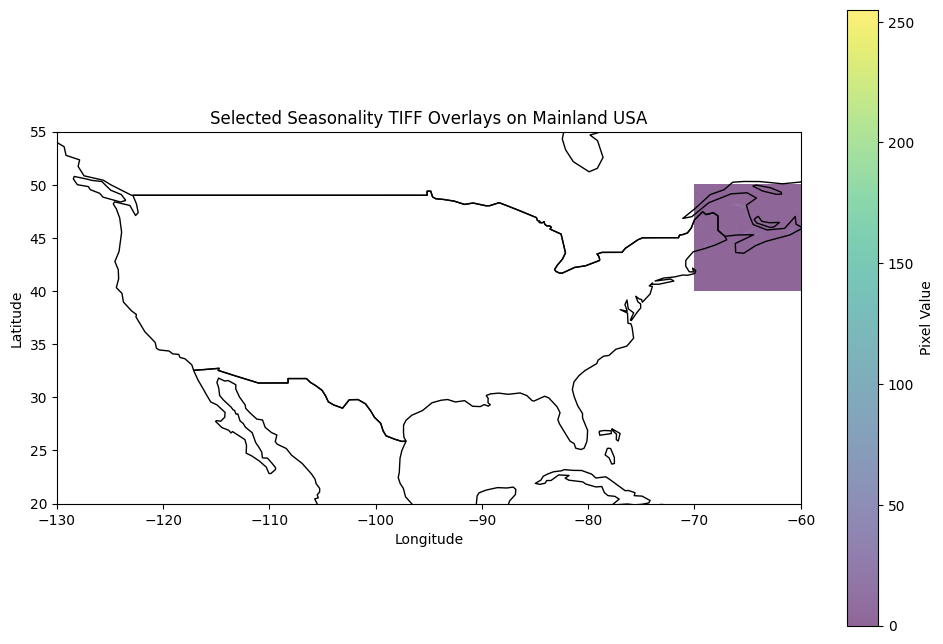

In [28]:
# remaining tiles to cover 
import rasterio
from rasterio.mask import mask
from rasterio.enums import Resampling
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
tif_folder_path = r'C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\Seasonality'
shapefile_path = r'C:\Users\rubab\Desktop\GWE_codes\WaterTable_dataUSGS\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp'  # Update to actual path

# List of specific TIFF filenames
selected_tifs = [ "seasonality_70W_50Nv1_4_2021.tif"
]

# Load mainland U.S. shapefile and ensure WGS84 (EPSG:4326)
usa_shape = gpd.read_file(shapefile_path)
if usa_shape.crs != 'EPSG:4326':
    usa_shape = usa_shape.to_crs('EPSG:4326')

# Plot mainland U.S.
fig, ax = plt.subplots(figsize=(12, 8))
usa_shape.boundary.plot(ax=ax, edgecolor="black", linewidth=1)
plt.title("Selected Seasonality TIFF Overlays on Mainland USA")
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Process each TIFF file
for tif_path in [Path(tif_folder_path) / tif_name for tif_name in selected_tifs]:
    with rasterio.open(tif_path) as src:
        # Downsample and read with memory map
        downsample_factor = 2  # Adjust factor as needed
        data = src.read(
            out_shape=(src.count, int(src.height / downsample_factor), int(src.width / downsample_factor)),
            resampling=Resampling.bilinear
        )
        transform = src.transform * src.transform.scale(downsample_factor, downsample_factor)

        # Clip to mainland U.S.
        usa_geometry = [feature["geometry"] for feature in usa_shape.__geo_interface__["features"]]
        try:
            clipped_data, clipped_transform = mask(src, usa_geometry, crop=True, nodata=0)
            print(f"Clipping {tif_path.name} successful.")
        except Exception as e:
            print(f"Error clipping {tif_path.name}: {e}")
            continue

        # Plot the clipped raster data
        extent = [
            clipped_transform[2],  # Left
            clipped_transform[2] + clipped_transform[0] * clipped_data.shape[2],  # Right
            clipped_transform[5] + clipped_transform[4] * clipped_data.shape[1],  # Bottom
            clipped_transform[5]  # Top
        ]
        plt.imshow(clipped_data[0], cmap='viridis', extent=extent, alpha=0.6)

# Show plot with color bar
plt.colorbar(label='Pixel Value')
plt.show()


In [30]:
#converting to binary 
import rasterio
from pathlib import Path
import numpy as np
from rasterio.enums import Resampling
import rasterio.warp
import os

# Paths
input_tiff_path = 'C:/Users/rubab/Desktop/GWE_codes/AncillaryWaterData/downloads_ancillary_downloadWaterData_PythonV3_2021/Seasonality/seasonality_70W_50Nv1_4_2021.tif'
mask_tiff_path = 'C:/Users/rubab/Desktop/GWE_codes/WaterTable_dataUSGS/masked_binary_image_30m.tif'  # Path to masking TIFF
binary_output_path = 'C:/Users/rubab/Desktop/GWE_codes/binarytiffs_seasonality/binary_seasonality_70W_50Nv1_4_2021.tif'
masked_output_path = 'C:/Users/rubab/Desktop/GWE_codes/masked_binarytiffs_seasonality/masked_binary_seasonality_70W_50Nv1_4_2021.tif'

# Ensure output directories exist
os.makedirs(Path(binary_output_path).parent, exist_ok=True)
os.makedirs(Path(masked_output_path).parent, exist_ok=True)

# Open the masking TIFF
with rasterio.open(mask_tiff_path) as mask_src:
    mask_data = mask_src.read(1)  # Read the first band of the mask
    mask_transform = mask_src.transform
    mask_crs = mask_src.crs

# Process the single TIFF file
try:
    with rasterio.open(input_tiff_path) as src:
        # Read the occurrence TIFF and convert to binary
        data = src.read(1)
        binary_data = np.where(data > 0, 1, 0).astype('uint8')

        # Resample the mask to match the occurrence TIFF
        mask_resampled = np.empty_like(binary_data, dtype='uint8')
        rasterio.warp.reproject(
            source=mask_data,
            destination=mask_resampled,
            src_transform=mask_transform,
            src_crs=mask_crs,
            dst_transform=src.transform,
            dst_crs=src.crs,
            resampling=Resampling.nearest,
        )

        # Apply the mask to the binary data
        masked_binary_data = np.where(mask_resampled == 1, binary_data, 0).astype('uint8')

        # Save the binary TIFF
        with rasterio.open(
            binary_output_path,
            "w",
            driver="GTiff",
            height=binary_data.shape[0],
            width=binary_data.shape[1],
            count=1,
            dtype="uint8",
            crs=src.crs,
            transform=src.transform,
        ) as dst:
            dst.write(binary_data, 1)

        # Save the masked binary TIFF
        with rasterio.open(
            masked_output_path,
            "w",
            driver="GTiff",
            height=masked_binary_data.shape[0],
            width=masked_binary_data.shape[1],
            count=1,
            dtype="uint8",
            crs=src.crs,
            transform=src.transform,
        ) as dst:
            dst.write(masked_binary_data, 1)

        print(f"Saved binary TIFF: {binary_output_path}")
        print(f"Saved masked binary TIFF: {masked_output_path}")

except Exception as e:
    print(f"Error processing {input_tiff_path}: {e}")


Saved binary TIFF: C:/Users/rubab/Desktop/GWE_codes/binarytiffs_seasonality/binary_seasonality_70W_50Nv1_4_2021.tif
Saved masked binary TIFF: C:/Users/rubab/Desktop/GWE_codes/masked_binarytiffs_seasonality/masked_binary_seasonality_70W_50Nv1_4_2021.tif


In [35]:
# Converting to binary with windowed processing
import rasterio
from pathlib import Path
import numpy as np
from rasterio.enums import Resampling
import rasterio.warp
import os

# Paths
input_tiff_path = 'C:/Users/rubab/Desktop/GWE_codes/AncillaryWaterData/downloads_ancillary_downloadWaterData_PythonV3_2021/occurrence_70W_50Nv1_4_2021.tif'
mask_tiff_path = 'C:/Users/rubab/Desktop/GWE_codes/WaterTable_dataUSGS/masked_binary_image_30m.tif'  # Path to masking TIFF
binary_output_path = 'C:/Users/rubab/Desktop/GWE_codes/binarytiffs_occurrence/binary_occurrence_70W_50Nv1_4_2021.tif'
masked_output_path = 'C:/Users/rubab/Desktop/GWE_codes/masked_binarytiffs_occurrence/masked_binary_occurrence_70W_50Nv1_4_2021.tif'

# Ensure output directories exist
os.makedirs(Path(binary_output_path).parent, exist_ok=True)
os.makedirs(Path(masked_output_path).parent, exist_ok=True)

# Open the masking TIFF
with rasterio.open(mask_tiff_path) as mask_src:
    mask_data = mask_src.read(1)  # Read the first band of the mask
    mask_transform = mask_src.transform
    mask_crs = mask_src.crs

# Process the single TIFF file using windowed reading
try:
    with rasterio.open(input_tiff_path) as src:
        # Prepare metadata for output
        meta = src.meta.copy()
        meta.update({
            "dtype": "uint8",
            "count": 1
        })

        # Create binary and masked binary TIFFs
        with rasterio.open(binary_output_path, "w", **meta) as binary_dst, \
             rasterio.open(masked_output_path, "w", **meta) as masked_dst:

            # Iterate over windows
            for idx, window in src.block_windows(1):  # `block_windows` provides windows for the first band
                # Read a window of data
                data = src.read(1, window=window)

                # Convert to binary: 1 for occurrence, 0 otherwise
                binary_data = np.where(data > 0, 1, 0).astype('uint8')

                # Resample the mask to match the current window
                mask_resampled = np.empty_like(binary_data, dtype='uint8')
                rasterio.warp.reproject(
                    source=mask_data,
                    destination=mask_resampled,
                    src_transform=mask_transform,
                    src_crs=mask_crs,
                    dst_transform=src.window_transform(window),
                    dst_crs=src.crs,
                    resampling=Resampling.nearest,
                )

                # Apply the mask to the binary data
                masked_binary_data = np.where(mask_resampled == 1, binary_data, 0).astype('uint8')

                # Write binary and masked binary data to output TIFFs
                binary_dst.write(binary_data, 1, window=window)
                masked_dst.write(masked_binary_data, 1, window=window)

        print(f"Saved binary TIFF: {binary_output_path}")
        print(f"Saved masked binary TIFF: {masked_output_path}")

except Exception as e:
    print(f"Error processing {input_tiff_path}: {e}")


Saved binary TIFF: C:/Users/rubab/Desktop/GWE_codes/binarytiffs_occurrence/binary_occurrence_70W_50Nv1_4_2021.tif
Saved masked binary TIFF: C:/Users/rubab/Desktop/GWE_codes/masked_binarytiffs_occurrence/masked_binary_occurrence_70W_50Nv1_4_2021.tif


In [37]:
# reclassify
import numpy as np
import rasterio as rio
from rasterio.enums import Resampling
from rasterio.windows import Window
from pathlib import Path
import os

# Paths
seasonality_file = Path(r'C:/Users/rubab/Desktop/GWE_codes/binarytiffs_seasonality/binary_seasonality_70W_50Nv1_4_2021.tif')
occurrence_file = Path(r'C:/Users/rubab/Desktop/GWE_codes/binarytiffs_occurrence/binary_occurrence_70W_50Nv1_4_2021.tif')
output_folder = Path(r'C:/Users/rubab/Desktop/GWE_codes/classified_tiffs')

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

def process_and_save_single_tiff(seasonality_file, occurrence_file, output_folder, chunk_size=1000):
    # Check if both files exist
    if not seasonality_file.exists() or not occurrence_file.exists():
        print(f"Error: One or both files do not exist.\nSeasonality file: {seasonality_file}\nOccurrence file: {occurrence_file}")
        return None

    print(f"Processing {seasonality_file.name} and {occurrence_file.name}")
    with rio.open(seasonality_file) as season_src, rio.open(occurrence_file) as occ_src:
        # Ensure CRS and dimensions match
        if season_src.crs != occ_src.crs or season_src.shape != occ_src.shape:
            print(f"Resampling {occurrence_file.name} to match {seasonality_file.name}")
            occurrence_data = occ_src.read(
                1, 
                out_shape=(season_src.height, season_src.width),
                resampling=Resampling.bilinear,
            )
        else:
            occurrence_data = occ_src.read(1)

        # Metadata and setup for output
        metadata = season_src.meta.copy()
        metadata.update({
            "count": 1,
            "dtype": "uint8",
            "compress": "lzw"
        })
        output_path = output_folder / f"classified_{seasonality_file.name}"

        with rio.open(output_path, "w", **metadata) as dst:
            for i in range(0, season_src.height, chunk_size):
                for j in range(0, season_src.width, chunk_size):
                    # Define window
                    window = Window(j, i, chunk_size, chunk_size)
                    
                    # Read seasonality and occurrence data for the window
                    seasonality_chunk = season_src.read(1, window=window)
                    occurrence_chunk = occ_src.read(1, window=window)

                    # Classify data: 0 for no water, 1 for seasonal, 2 for permanent
                    classified_chunk = np.zeros(seasonality_chunk.shape, dtype="uint8")
                    classified_chunk[seasonality_chunk > 0] = 1  # Seasonal water
                    classified_chunk[occurrence_chunk > 0] = 2  # Permanent water
                    classified_chunk[
                        (seasonality_chunk == 0) & (occurrence_chunk == 0)
                    ] = 0  # No water

                    # Write classified chunk to output
                    dst.write(classified_chunk, 1, window=window)

        print(f"Saved classified TIFF: {output_path}")

# Call the function
process_and_save_single_tiff(seasonality_file, occurrence_file, output_folder, chunk_size=1000)


Processing binary_seasonality_70W_50Nv1_4_2021.tif and binary_occurrence_70W_50Nv1_4_2021.tif
Saved classified TIFF: C:\Users\rubab\Desktop\GWE_codes\classified_tiffs\classified_binary_seasonality_70W_50Nv1_4_2021.tif


In [49]:
def combine_tiffs_incremental(input_folder, output_path):
    print("Combining TIFFs incrementally...")
    tiff_files = sorted(input_folder.glob("*.tif"))
    if not tiff_files:
        raise FileNotFoundError(f"No TIFF files found in {input_folder}")

    src_files = [rasterio.open(f) for f in tiff_files]
    metadata = src_files[0].meta.copy()
    metadata.update({
        "height": sum(src.height for src in src_files),
        "width": max(src.width for src in src_files),
        "count": 1,
        "dtype": "uint8"
    })

    with rasterio.open(output_path, "w", **metadata) as dst:
        y_offset = 0
        for src in src_files:
            data = src.read(1)
            dst.write(data, 1, window=Window(0, y_offset, src.width, src.height))
            y_offset += src.height
    print(f"Combined TIFF saved at {output_path}")


Clipping transitions_130W_40Nv1_4_2021.tif successful.
Clipping transitions_120W_50Nv1_4_2021.tif successful.
Clipping transitions_120W_40Nv1_4_2021.tif successful.
Clipping transitions_110W_50Nv1_4_2021.tif successful.
Clipping transitions_110W_40Nv1_4_2021.tif successful.
Clipping transitions_110W_30Nv1_4_2021.tif successful.
Clipping transitions_100W_50Nv1_4_2021.tif successful.
Clipping transitions_100W_40Nv1_4_2021.tif successful.
Clipping transitions_100W_30Nv1_4_2021.tif successful.
Clipping transitions_90W_50Nv1_4_2021.tif successful.
Clipping transitions_90W_40Nv1_4_2021.tif successful.
Clipping transitions_90W_30Nv1_4_2021.tif successful.
Clipping transitions_80W_50Nv1_4_2021.tif successful.
Clipping transitions_80W_40Nv1_4_2021.tif successful.
Clipping transitions_130W_50Nv1_4_2021.tif successful.


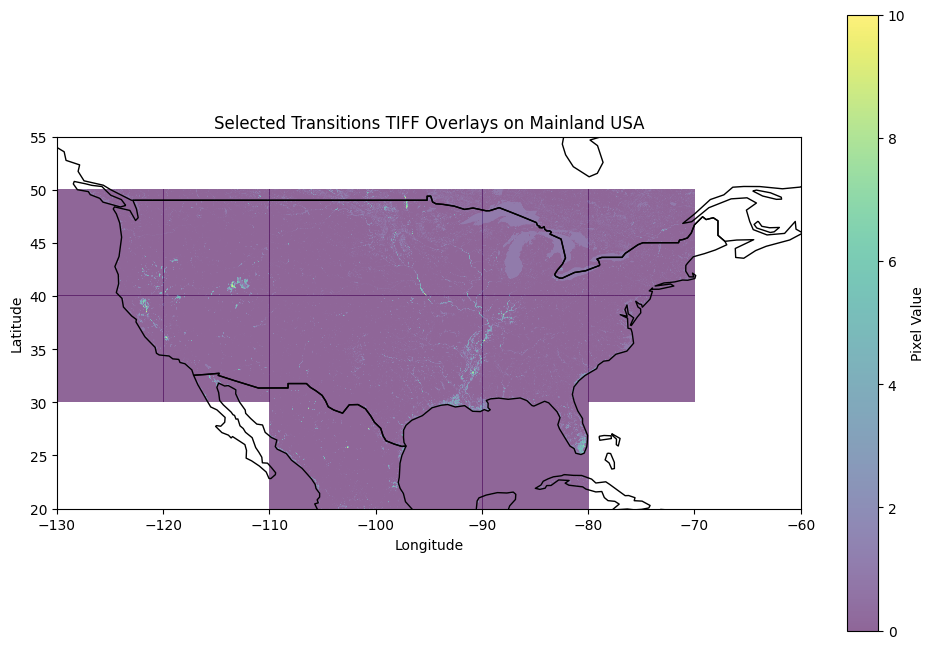

In [1]:
import rasterio
from rasterio.mask import mask
from rasterio.enums import Resampling
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
tif_folder_path = r'C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans'
shapefile_path = r'C:\Users\rubab\Desktop\GWE_codes\WaterTable_dataUSGS\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp'  # Update to actual path

# List of specific TIFF filenames for "transitions"
selected_tifs = [
    "transitions_130W_40Nv1_4_2021.tif", "transitions_120W_50Nv1_4_2021.tif", "transitions_120W_40Nv1_4_2021.tif",
    "transitions_110W_50Nv1_4_2021.tif", "transitions_110W_40Nv1_4_2021.tif", "transitions_110W_30Nv1_4_2021.tif",
    "transitions_100W_50Nv1_4_2021.tif", "transitions_100W_40Nv1_4_2021.tif", "transitions_100W_30Nv1_4_2021.tif",
    "transitions_90W_50Nv1_4_2021.tif", "transitions_90W_40Nv1_4_2021.tif", "transitions_90W_30Nv1_4_2021.tif",
    "transitions_80W_50Nv1_4_2021.tif", "transitions_80W_40Nv1_4_2021.tif", "transitions_130W_50Nv1_4_2021.tif"
]

# Load mainland U.S. shapefile and ensure WGS84 (EPSG:4326)
usa_shape = gpd.read_file(shapefile_path)
if usa_shape.crs != 'EPSG:4326':
    usa_shape = usa_shape.to_crs('EPSG:4326')

# Plot mainland U.S.
fig, ax = plt.subplots(figsize=(12, 8))
usa_shape.boundary.plot(ax=ax, edgecolor="black", linewidth=1)
plt.title("Selected Transitions TIFF Overlays on Mainland USA")
plt.xlim(-130, -60)
plt.ylim(20, 55)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Process each TIFF file
for tif_path in [Path(tif_folder_path) / tif_name for tif_name in selected_tifs]:
    with rasterio.open(tif_path) as src:
        # Downsample and read with memory map
        downsample_factor = 2  # Adjust factor as needed
        data = src.read(
            out_shape=(src.count, int(src.height / downsample_factor), int(src.width / downsample_factor)),
            resampling=Resampling.bilinear
        )
        transform = src.transform * src.transform.scale(downsample_factor, downsample_factor)

        # Clip to mainland U.S.
        usa_geometry = [feature["geometry"] for feature in usa_shape.__geo_interface__["features"]]
        try:
            clipped_data, clipped_transform = mask(src, usa_geometry, crop=True, nodata=0)
            print(f"Clipping {tif_path.name} successful.")
        except Exception as e:
            print(f"Error clipping {tif_path.name}: {e}")
            continue

        # Plot the clipped raster data
        extent = [
            clipped_transform[2],  # Left
            clipped_transform[2] + clipped_transform[0] * clipped_data.shape[2],  # Right
            clipped_transform[5] + clipped_transform[4] * clipped_data.shape[1],  # Bottom
            clipped_transform[5]  # Top
        ]
        plt.imshow(clipped_data[0], cmap='viridis', extent=extent, alpha=0.6)

# Show plot with color bar
plt.colorbar(label='Pixel Value')
plt.show()


In [6]:
#Laura's code 
from rasterio.plot import show
from rasterio.merge import merge
import rasterio as rio
from pathlib import Path
import numpy as np
import os

# Set the working directory dynamically
base_dir = Path(r"C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021")
os.chdir(base_dir)

# Define paths
path = base_dir / 'trans'
output_dir = base_dir / 'trans_output'
output_dir.mkdir(parents=True, exist_ok=True)  # Create output directory if it doesn't exist

mosaic_output_path = output_dir / 'mosaic_output.tif'

# List all raster files in the transitions folder
raster_files = list(path.glob("*.tif"))  # Ensure only .tif files are selected
raster_files_test = raster_files[1:3]   # Subset for testing if needed
raster_to_mosaic = []

# Open all raster files
for p in raster_files:
    raster = rio.open(p)
    raster_to_mosaic.append(raster)

# Merge the raster tiles into one mosaic
mosaic, output = merge(raster_to_mosaic, dtype='int8', nodata=0)

# Update metadata for the output mosaic
output_meta = raster.meta.copy()
output_meta.update(
    {
        "driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": output,
        "nodata": 0,
        "compress": 'lzw',
    }
)

# Write the mosaic to a GeoTIFF
with rio.open(mosaic_output_path, 'w', **output_meta) as m:
    m.write(mosaic)

# Reclassify the mosaic to show permanent vs. non-permanent water bodies
# Categories:
# Permanent (2): 1, 2, 3, 7, 8, 9
# Non-permanent (1): 4, 5, 6, 10

reclass_mosaic = mosaic.copy()

# Reclassify categories
reclass_mosaic[np.isin(mosaic, [1, 2, 3, 7, 8, 9])] = 2  # Permanent
reclass_mosaic[np.isin(mosaic, [4, 5, 6, 10])] = 1       # Non-permanent

# Save the reclassified mosaic
reclass_output_path = output_dir / 'mosaic_reclass.tif'
with rio.open(reclass_output_path, 'w', **output_meta) as m:
    m.write(reclass_mosaic)


MemoryError: Unable to allocate 35.8 GiB for an array with shape (1, 160000, 240000) and data type int8

In [11]:
from rasterio.merge import merge
from rasterio.windows import Window
from rasterio.enums import Resampling
import rasterio as rio
from pathlib import Path

# Set directories
base_dir = Path(r"C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021")
input_dir = base_dir / 'trans'
output_dir = base_dir / 'trans_output'
output_dir.mkdir(parents=True, exist_ok=True)

# Output paths
partial_dir = output_dir / "partials"
partial_dir.mkdir(parents=True, exist_ok=True)
final_mosaic_path = output_dir / "final_mosaic.tif"

# Get all raster files
raster_files = list(input_dir.glob("*.tif"))

# Define function to process a raster file in windows
def process_raster_in_windows(raster_path, output_path, downsample_factor=2):
    with rio.open(raster_path) as src:
        # Calculate the size of the downsampled raster
        new_height = src.height // downsample_factor
        new_width = src.width // downsample_factor
        transform = src.transform * src.transform.scale(
            downsample_factor, downsample_factor
        )

        # Create an output raster
        meta = src.meta.copy()
        meta.update({
            "driver": "GTiff",
            "height": new_height,
            "width": new_width,
            "transform": transform,
            "compress": "lzw",
            "dtype": "int8",
            "nodata": 0,
        })

        with rio.open(output_path, "w", **meta) as dest:
            # Read and write data in windows
            for ji, window in src.block_windows():
                # Adjust window dimensions for the downsampled raster
                downsampled_window = Window(
                    col_off=window.col_off // downsample_factor,
                    row_off=window.row_off // downsample_factor,
                    width=window.width // downsample_factor,
                    height=window.height // downsample_factor,
                )

                # Read data from the original window
                data = src.read(
                    window=window,
                    out_shape=(
                        src.count,
                        window.height // downsample_factor,
                        window.width // downsample_factor,
                    ),
                    resampling=Resampling.bilinear,
                )

                # Write to the downsampled window
                dest.write(data, window=downsampled_window)

    print(f"Processed raster {raster_path.name} into {output_path}")

# Process each raster individually and save the results
processed_files = []
for idx, raster_path in enumerate(raster_files):
    output_path = partial_dir / f"processed_{idx}.tif"
    process_raster_in_windows(raster_path, output_path)
    processed_files.append(output_path)

# Merge all processed rasters into the final mosaic
print("Merging all processed rasters...")
raster_to_mosaic = [rio.open(p) for p in processed_files]
final_mosaic, output_transform = merge(raster_to_mosaic, dtype="int8", nodata=0)

# Update metadata for the final mosaic
meta = raster_to_mosaic[0].meta.copy()
meta.update({
    "driver": "GTiff",
    "dtype": "int8",
    "nodata": 0,
    "count": final_mosaic.shape[0],
    "height": final_mosaic.shape[1],
    "width": final_mosaic.shape[2],
    "transform": output_transform,
    "compress": "lzw",
})

# Save the final mosaic
with rio.open(final_mosaic_path, "w", **meta) as dest:
    dest.write(final_mosaic)

print(f"Final mosaic saved to {final_mosaic_path}")


Processed raster transitions_100W_20Nv1_4_2021.tif into C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\partials\processed_0.tif
Processed raster transitions_100W_30Nv1_4_2021.tif into C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\partials\processed_1.tif
Processed raster transitions_100W_40Nv1_4_2021.tif into C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\partials\processed_2.tif
Processed raster transitions_100W_50Nv1_4_2021.tif into C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\partials\processed_3.tif
Processed raster transitions_110W_20Nv1_4_2021.tif into C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\partials\processed_4.tif
Processed 

MemoryError: Unable to allocate 8.94 GiB for an array with shape (1, 80000, 120000) and data type uint8

In [1]:
from rasterio.windows import Window, from_bounds
from rasterio.warp import calculate_default_transform
import rasterio as rio
from pathlib import Path

# Set directories
base_dir = Path(r"C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021")
input_dir = base_dir / 'trans'
output_dir = base_dir / 'trans_output'
output_dir.mkdir(parents=True, exist_ok=True)

# Output paths
partial_dir = output_dir / "partials"
partial_dir.mkdir(parents=True, exist_ok=True)
final_mosaic_path = output_dir / "final_mosaic.tif"

# Get all processed raster files
processed_files = list(partial_dir.glob("*.tif"))

# Define a function to incrementally create the mosaic
def memory_efficient_mosaic(processed_files, output_path, nodata=0, block_size=256):
    # Open all processed files
    rasters = [rio.open(p) for p in processed_files]

    # Calculate the overall bounds
    left = min([r.bounds.left for r in rasters])
    bottom = min([r.bounds.bottom for r in rasters])
    right = max([r.bounds.right for r in rasters])
    top = max([r.bounds.top for r in rasters])
    bounds = (left, bottom, right, top)

    # Get resolution from the first raster
    first_raster = rasters[0]
    resolution = first_raster.res

    # Calculate width and height based on bounds and resolution
    width = int((right - left) / resolution[0])
    height = int((top - bottom) / resolution[1])

    # Calculate the overall transform
    output_transform, _, _ = calculate_default_transform(
        first_raster.crs, first_raster.crs,
        width=width, height=height,
        left=bounds[0], bottom=bounds[1], right=bounds[2], top=bounds[3]
    )

    # Create metadata for the output mosaic
    meta = first_raster.meta.copy()
    meta.update({
        "driver": "GTiff",
        "height": height,
        "width": width,
        "transform": output_transform,
        "compress": "lzw",
        "dtype": "int8",
        "nodata": nodata,
        "blockxsize": block_size,
        "blockysize": block_size,
        "tiled": True,
    })

    # Create the output raster
    with rio.open(output_path, "w", **meta) as dest:
        for raster in rasters:
            print(f"Processing raster: {raster.name}")
            for ji, window in raster.block_windows():
                # Read and process blocks incrementally
                data = raster.read(window=window, indexes=1)

                # Calculate the bounding box of the window
                window_bounds = rio.windows.bounds(window, raster.transform)

                # Map the window to the output raster grid
                dst_window = from_bounds(
                    *window_bounds,
                    transform=output_transform
                )

                # Ensure window fits within destination raster bounds
                col_off = max(0, int(dst_window.col_off))
                row_off = max(0, int(dst_window.row_off))
                width = min(block_size, dest.width - col_off)
                height = min(block_size, dest.height - row_off)

                dst_window = Window(col_off, row_off, width, height)

                # Write data incrementally
                if width > 0 and height > 0:
                    dest.write(data, indexes=1, window=dst_window)

    print(f"Final mosaic saved to {output_path}")

# Run the mosaic creation
memory_efficient_mosaic(processed_files, final_mosaic_path)


Processing raster: C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\partials\processed_0.tif
Processing raster: C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\partials\processed_1.tif
Processing raster: C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\partials\processed_10.tif
Processing raster: C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\partials\processed_11.tif
Processing raster: C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\partials\processed_12.tif
Processing raster: C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\partials\processed_13.tif
Processing raster: C:\Users\ru

Found 24 processed raster files.


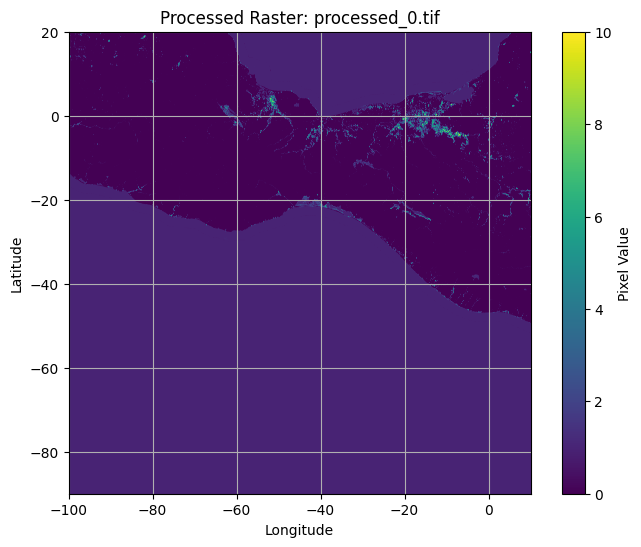

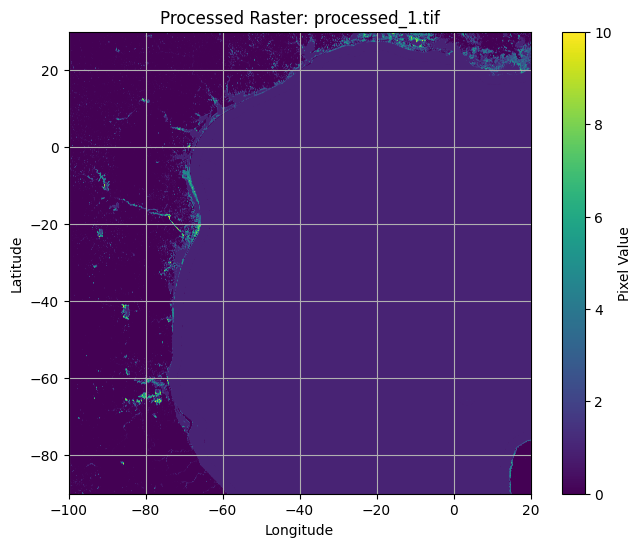

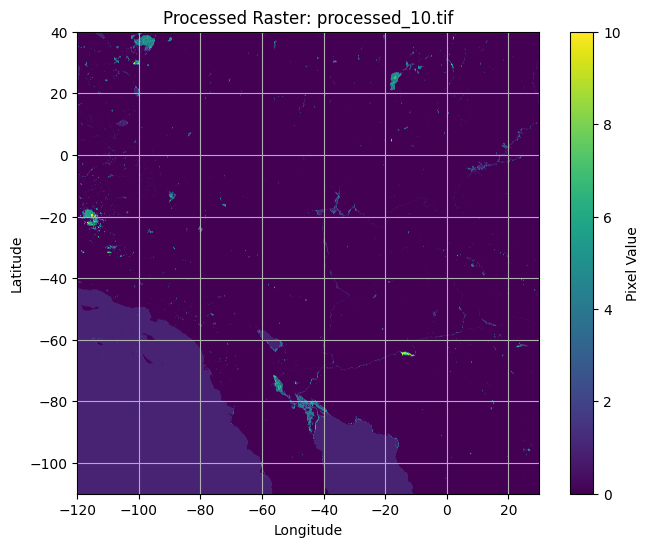

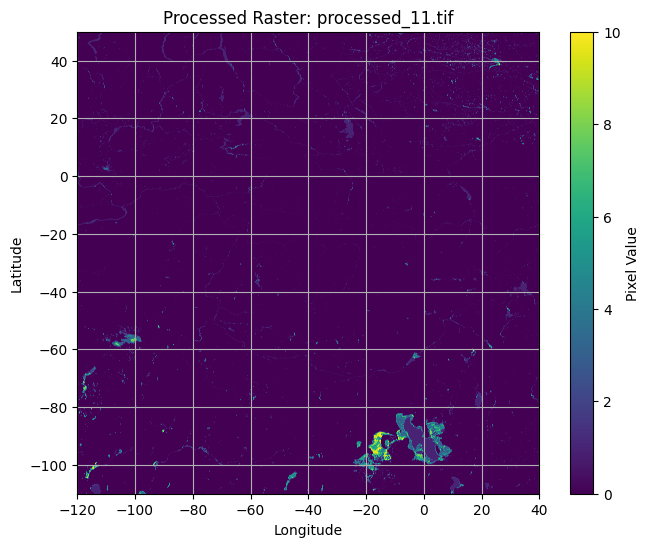

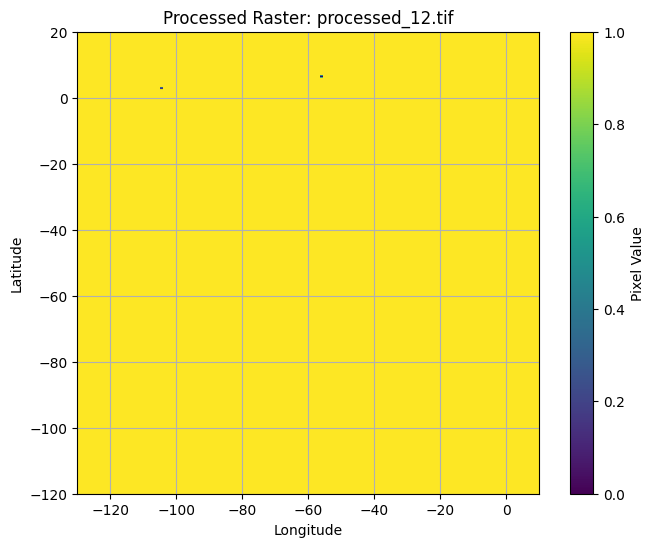

Displaying the final mosaic...


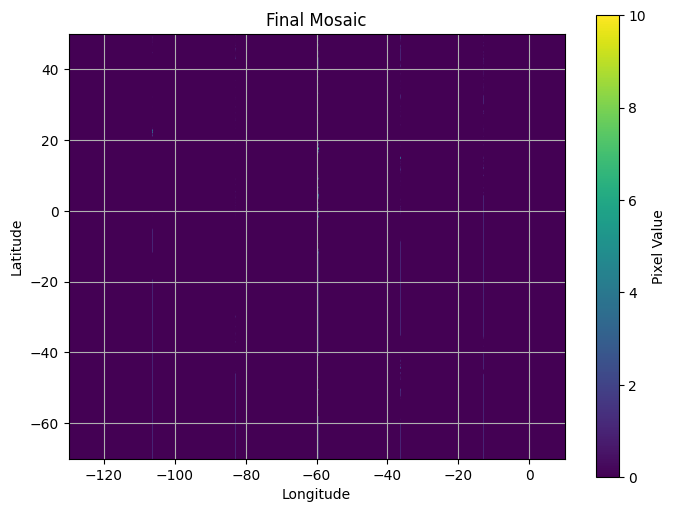

In [2]:
import rasterio
import matplotlib.pyplot as plt
from pathlib import Path

# Set directories
partial_dir = Path(r"C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\partials")
final_mosaic_path = Path(r"C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\final_mosaic.tif")

# Function to plot a raster
def plot_raster(raster_path, title="Raster Image"):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        plt.figure(figsize=(8, 6))
        plt.imshow(data, cmap="viridis", extent=src.bounds)
        plt.colorbar(label="Pixel Value")
        plt.title(title)
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.grid(True)
        plt.show()

# Plot individual processed rasters
processed_files = list(partial_dir.glob("processed_*.tif"))
print(f"Found {len(processed_files)} processed raster files.")
for raster_path in processed_files[:5]:  # Display first 5 for brevity
    plot_raster(raster_path, title=f"Processed Raster: {raster_path.name}")

# Plot the final mosaic
print("Displaying the final mosaic...")
plot_raster(final_mosaic_path, title="Final Mosaic")


In [3]:
from rasterio.windows import Window
import rasterio as rio
import numpy as np
from pathlib import Path

# Define base and output directories
base_dir = Path(r"C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021")
partial_dir = base_dir / 'trans_output' / 'partials'
reclass_dir = base_dir / 'trans_output' / 'reclassified'
reclass_dir.mkdir(parents=True, exist_ok=True)

# Reclassification categories
permanent_categories = [1, 2, 3, 7, 8, 9]
non_permanent_categories = [4, 5, 6, 10]

# Process each raster file in the partials directory
for raster_path in partial_dir.glob("processed_*.tif"):
    print(f"Reclassifying raster: {raster_path.name}")
    
    with rio.open(raster_path) as src:
        # Read the raster data
        data = src.read(1)  # Read the first band
        
        # Reclassify the raster
        reclassified = np.zeros_like(data, dtype="int8")  # Initialize with zeros
        reclassified[np.isin(data, permanent_categories)] = 2  # Permanent
        reclassified[np.isin(data, non_permanent_categories)] = 1  # Non-permanent
        
        # Prepare output metadata
        meta = src.meta.copy()
        meta.update({
            "dtype": "int8",
            "nodata": 0,
            "compress": "lzw",
        })
        
        # Save the reclassified raster
        reclass_output_path = reclass_dir / f"reclass_{raster_path.name}"
        with rio.open(reclass_output_path, "w", **meta) as dst:
            dst.write(reclassified, indexes=1)
    
    print(f"Saved reclassified raster: {reclass_output_path.name}")


Reclassifying raster: processed_0.tif
Saved reclassified raster: reclass_processed_0.tif
Reclassifying raster: processed_1.tif
Saved reclassified raster: reclass_processed_1.tif
Reclassifying raster: processed_10.tif
Saved reclassified raster: reclass_processed_10.tif
Reclassifying raster: processed_11.tif
Saved reclassified raster: reclass_processed_11.tif
Reclassifying raster: processed_12.tif
Saved reclassified raster: reclass_processed_12.tif
Reclassifying raster: processed_13.tif
Saved reclassified raster: reclass_processed_13.tif
Reclassifying raster: processed_14.tif
Saved reclassified raster: reclass_processed_14.tif
Reclassifying raster: processed_15.tif
Saved reclassified raster: reclass_processed_15.tif
Reclassifying raster: processed_16.tif
Saved reclassified raster: reclass_processed_16.tif
Reclassifying raster: processed_17.tif
Saved reclassified raster: reclass_processed_17.tif
Reclassifying raster: processed_18.tif
Saved reclassified raster: reclass_processed_18.tif
Rec

Found 24 reclassified raster files.


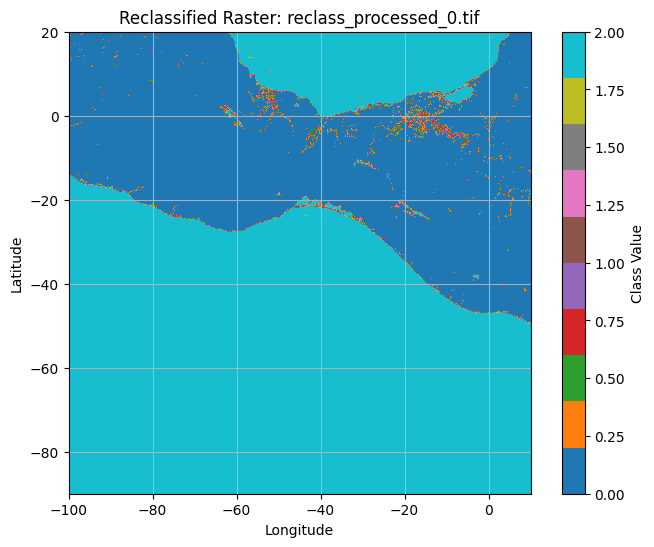

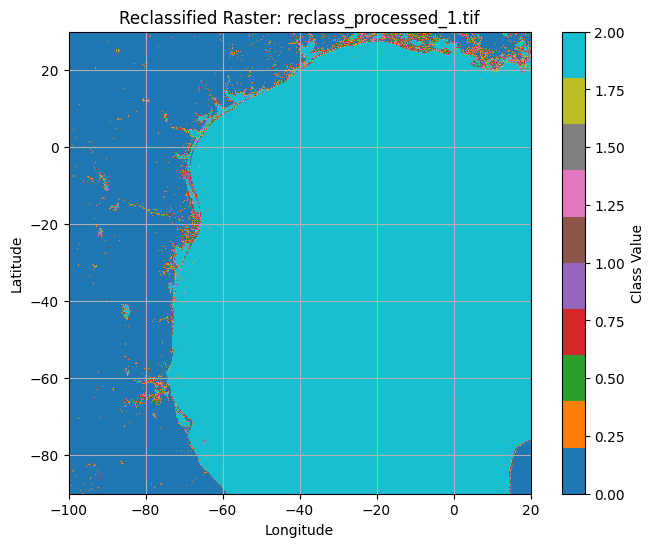

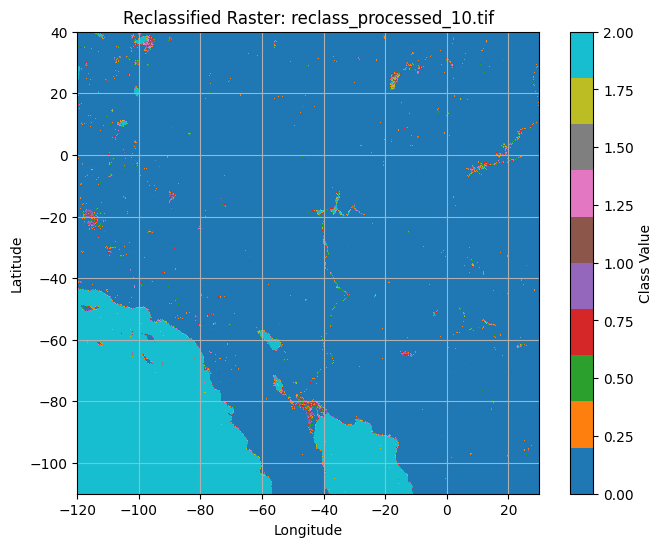

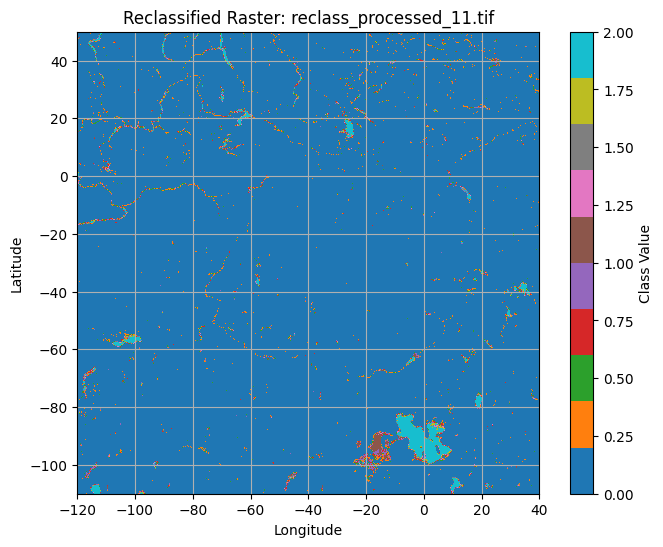

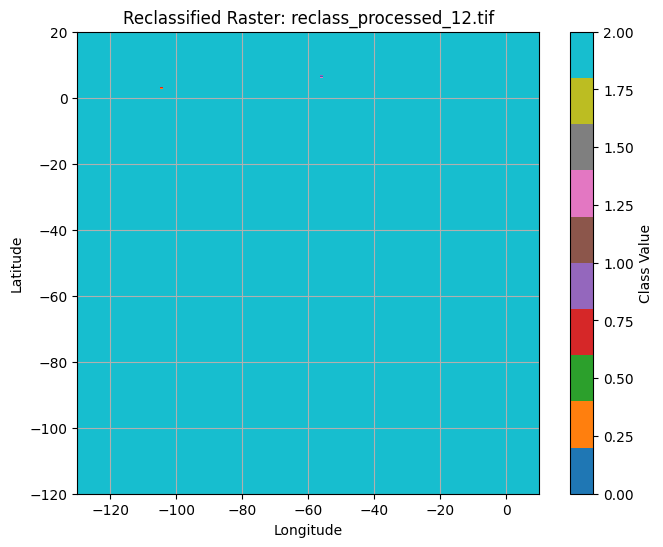

In [4]:
import rasterio
import matplotlib.pyplot as plt
from pathlib import Path

# Define the directory containing reclassified rasters
reclass_dir = Path(r"C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\reclassified")

# Function to plot a raster
def plot_raster(raster_path, title="Reclassified Raster"):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        plt.figure(figsize=(8, 6))
        plt.imshow(data, cmap="tab10", extent=src.bounds)  # Using 'tab10' for distinct classes
        plt.colorbar(label="Class Value")
        plt.title(title)
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.grid(True)
        plt.show()

# Get all reclassified raster files
reclassified_files = list(reclass_dir.glob("reclass_*.tif"))
print(f"Found {len(reclassified_files)} reclassified raster files.")

# Plot a few reclassified rasters
for raster_path in reclassified_files[:5]:  # Display the first 5 for brevity
    plot_raster(raster_path, title=f"Reclassified Raster: {raster_path.name}")


Found 24 reclassified raster files.
Raster: reclass_processed_0.tif
  Count of 1s (Non-permanent): 1884472
  Count of 2s (Permanent): 254487883


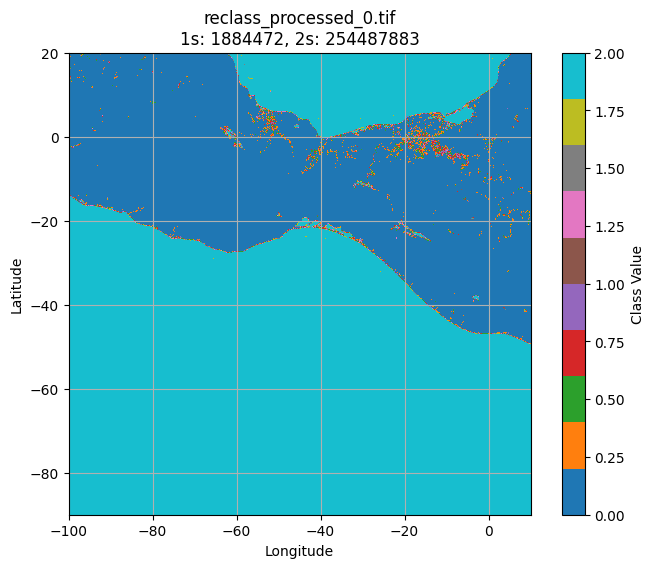

Raster: reclass_processed_1.tif
  Count of 1s (Non-permanent): 3799215
  Count of 2s (Permanent): 276514973


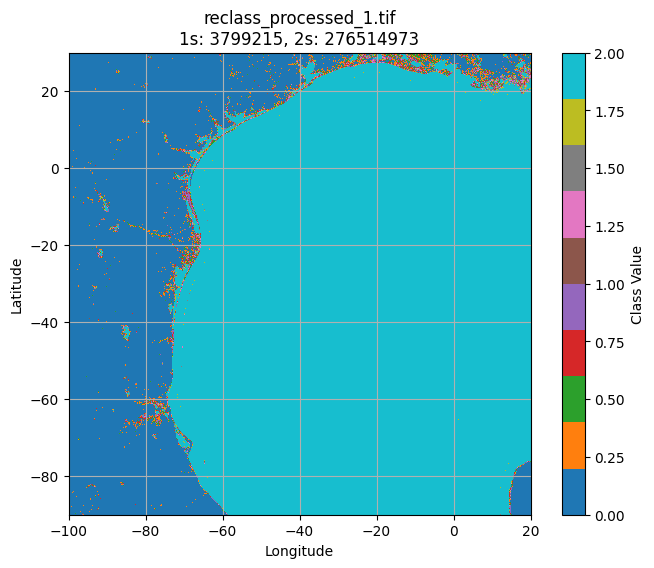

Raster: reclass_processed_10.tif
  Count of 1s (Non-permanent): 1934767
  Count of 2s (Permanent): 63910095


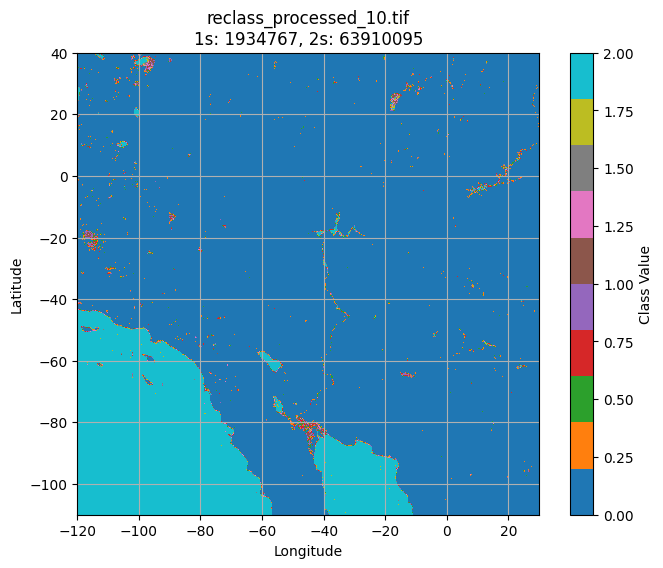

Raster: reclass_processed_11.tif
  Count of 1s (Non-permanent): 3026429
  Count of 2s (Permanent): 6725731


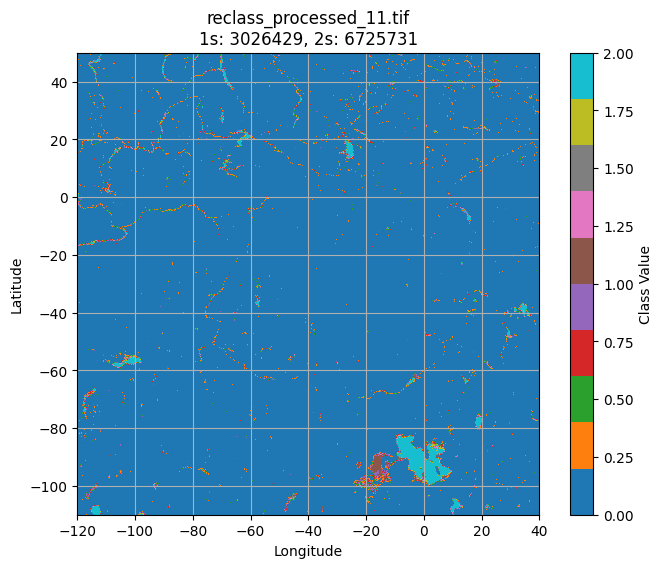

Raster: reclass_processed_12.tif
  Count of 1s (Non-permanent): 0
  Count of 2s (Permanent): 399981056


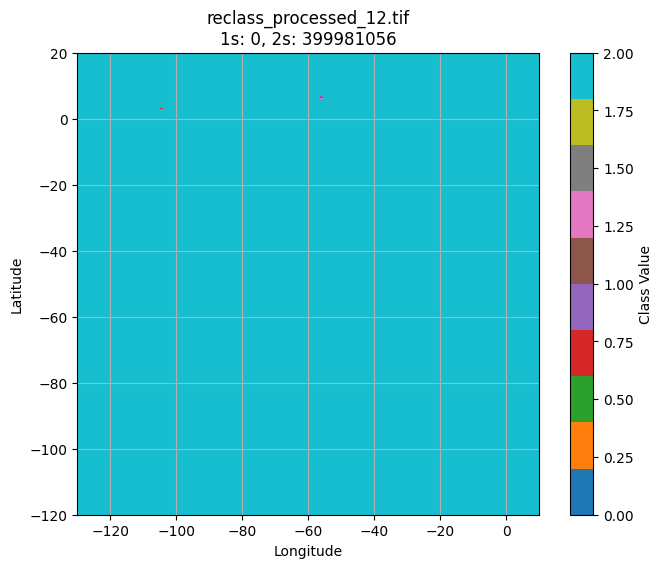

In [5]:
import rasterio
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Define the directory containing reclassified rasters
reclass_dir = Path(r"C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\reclassified")

# Function to plot a raster and count values
def analyze_raster(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        
        # Count occurrences of 1s and 2s
        count_ones = np.sum(data == 1)
        count_twos = np.sum(data == 2)
        
        print(f"Raster: {raster_path.name}")
        print(f"  Count of 1s (Non-permanent): {count_ones}")
        print(f"  Count of 2s (Permanent): {count_twos}")
        
        # Plot the raster
        plt.figure(figsize=(8, 6))
        plt.imshow(data, cmap="tab10", extent=src.bounds)  # Using 'tab10' for distinct classes
        plt.colorbar(label="Class Value")
        plt.title(f"{raster_path.name}\n1s: {count_ones}, 2s: {count_twos}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.grid(True)
        plt.show()

# Get all reclassified raster files
reclassified_files = list(reclass_dir.glob("reclass_*.tif"))
print(f"Found {len(reclassified_files)} reclassified raster files.")

# Analyze and plot each reclassified raster
for raster_path in reclassified_files[:5]:  # Display and analyze the first 5 for brevity
    analyze_raster(raster_path)


In [7]:
import rasterio
import numpy as np
from pathlib import Path

# Define the directory containing the reclassified rasters
reclass_dir = Path(r"C:\Users\rubab\Desktop\GWE_codes\classified_tiffs")

# Function to calculate the counts of `1`s and `2`s
def count_values_in_raster(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        
        # Count occurrences of 1s and 2s
        count_ones = np.sum(data == 1)
        count_twos = np.sum(data == 2)
        
    return count_ones, count_twos

# Get all TIFF files in the directory
tiff_files = list(reclass_dir.glob("*.tif"))
print(f"Found {len(tiff_files)} TIFF files in the folder.")

# Create a list to store the results
results = []

# Process each raster
for raster_path in tiff_files:
    count_ones, count_twos = count_values_in_raster(raster_path)
    results.append({
        "Filename": raster_path.name,
        "Count of 1s": count_ones,
        "Count of 2s": count_twos
    })

# Display the results
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

# Save the results to a CSV file (optional)
output_csv = reclass_dir / "reclassified_counts_trans.csv"
df_results.to_csv(output_csv, index=False)
print(f"Results saved to {output_csv}")


Found 24 TIFF files in the folder.
            Filename  Count of 1s  Count of 2s
0    processed_0.tif    254008710       295709
1    processed_1.tif    275547063       338499
2   processed_10.tif     62821919        82990
3   processed_11.tif      4637324       107382
4   processed_12.tif    399981056            0
5   processed_13.tif    400000000            0
6   processed_14.tif    349829975        39740
7   processed_15.tif    230589304        78470
8   processed_16.tif    344879563       162824
9   processed_17.tif    371755529       300180
10  processed_18.tif    300464741       169528
11  processed_19.tif     53788200       235396
12   processed_2.tif      5020849       695451
13  processed_20.tif    267216292       263479
14  processed_21.tif    331299512       333478
15  processed_22.tif     22020246       372407
16  processed_23.tif    106368363       207474
17   processed_3.tif     17881151      1243665
18   processed_4.tif    360163083        40405
19   processed_5.tif     

Found 24 TIFF files in Reclassified directory.


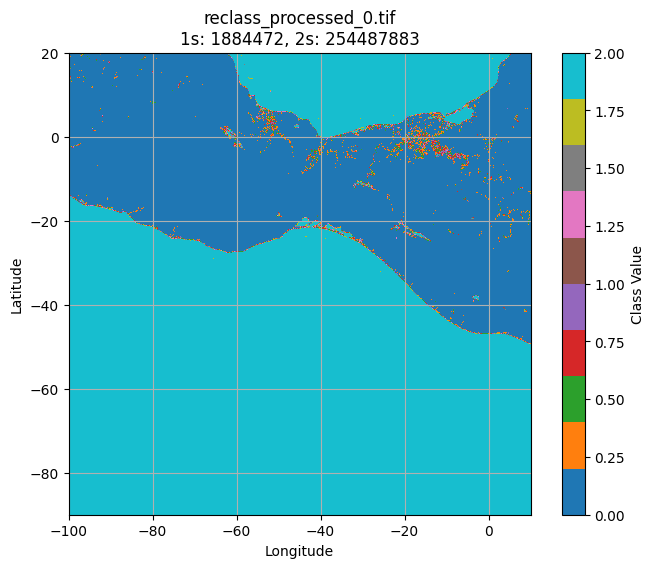

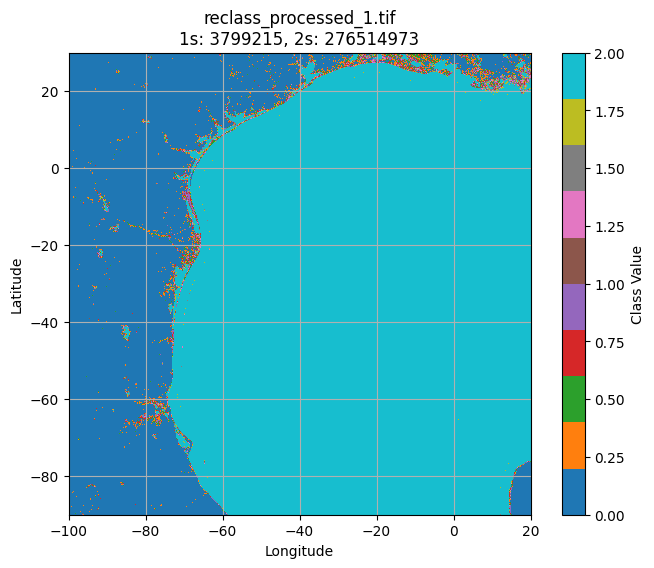

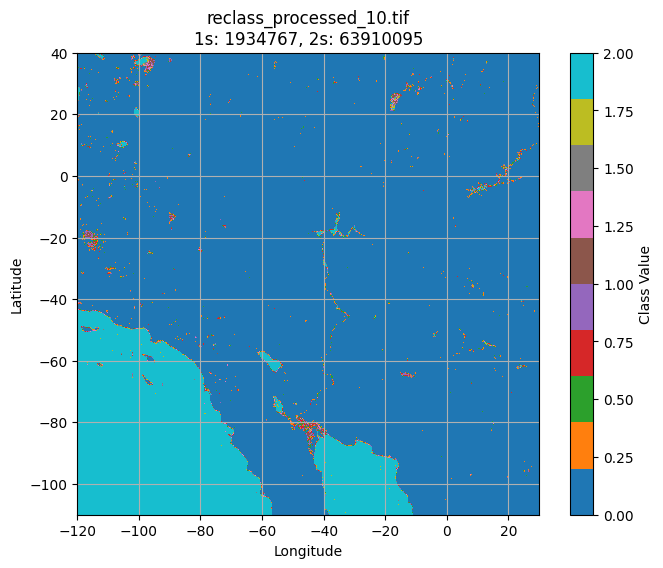

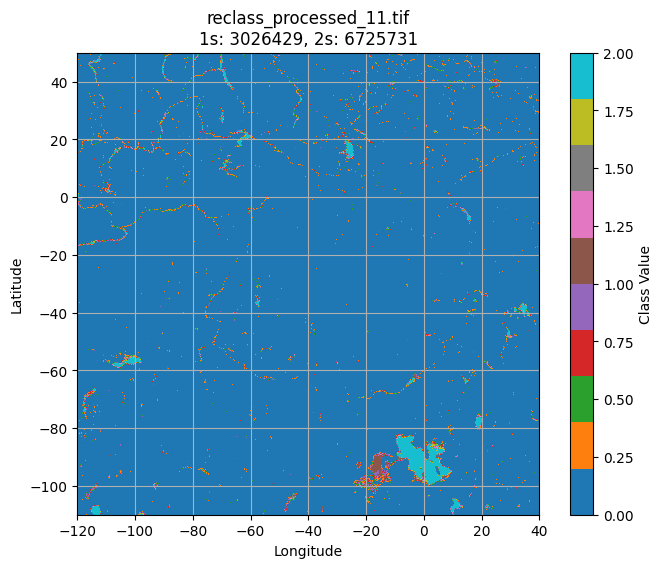

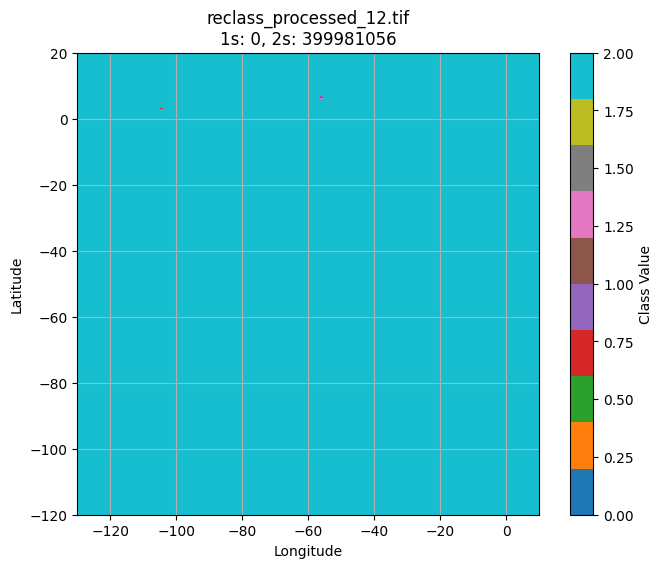

Found 16 TIFF files in Partials directory.


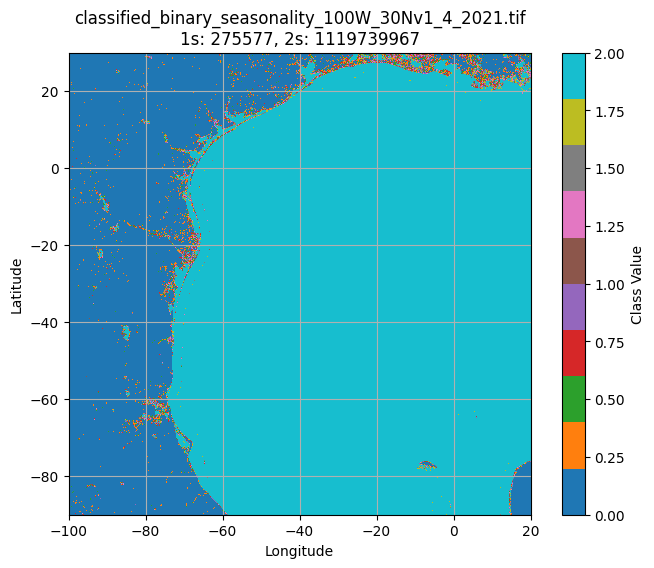

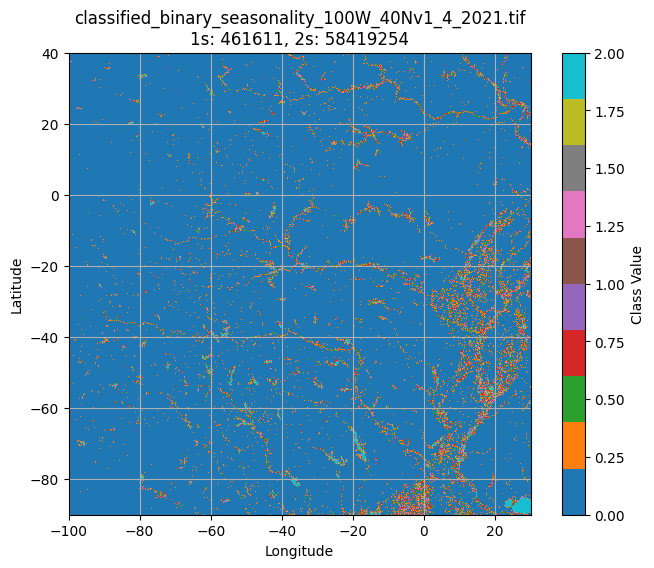

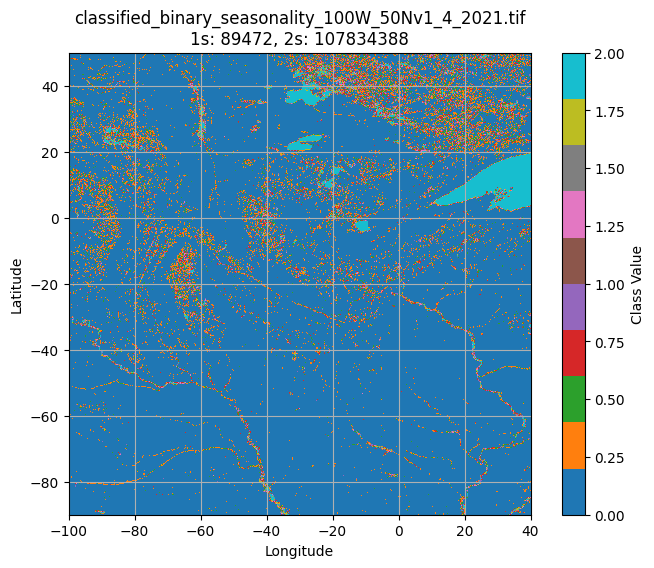

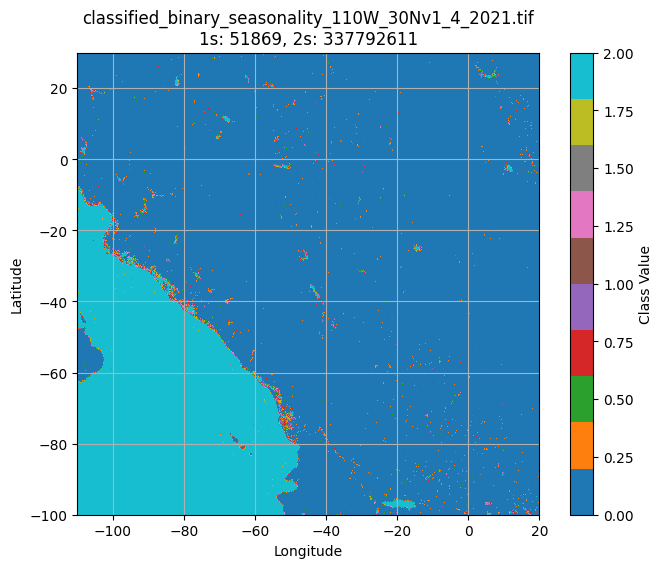

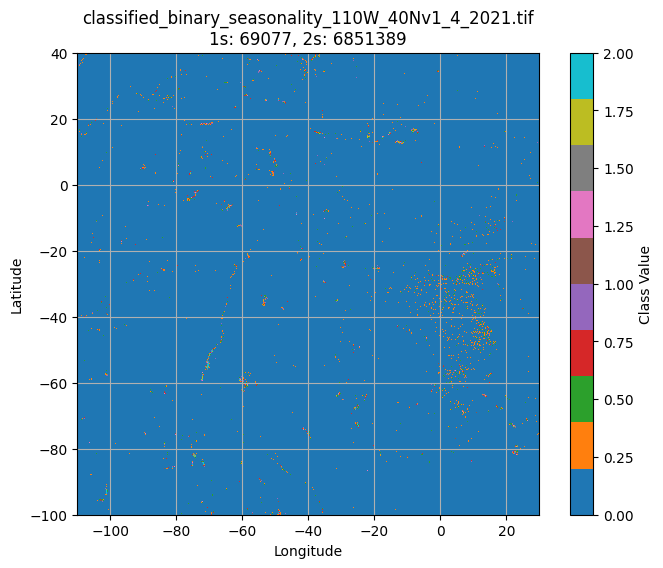

Results saved to C:\Users\rubab\Desktop\GWE_codes\1s_2s_report\reclassified_counts_combined.csv
              Count of 1s  Count of 2s
Directory                             
Partials           947606   1630637609
Reclassified     10644883   1001619738

Overall Comparison:
Total Count of 1s: 11592489
Total Count of 2s: 2632257347
2s are more prevalent overall.


In [10]:
import rasterio
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd

# Define the directories containing reclassified rasters
reclass_dir1 = Path(r"C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\reclassified")
reclass_dir2 = Path(r"C:\Users\rubab\Desktop\GWE_codes\classified_tiffs")

# Function to analyze a raster and return counts of 1s and 2s
def analyze_raster(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        
        # Count occurrences of 1s and 2s
        count_ones = np.sum(data == 1)
        count_twos = np.sum(data == 2)
        
        # Plot the raster
        plt.figure(figsize=(8, 6))
        plt.imshow(data, cmap="tab10", extent=src.bounds)  # Using 'tab10' for distinct classes
        plt.colorbar(label="Class Value")
        plt.title(f"{raster_path.name}\n1s: {count_ones}, 2s: {count_twos}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.grid(True)
        plt.show()
        
        return count_ones, count_twos

# Function to process rasters in a directory
def process_directory(directory, label):
    tiff_files = list(directory.glob("*.tif"))
    print(f"Found {len(tiff_files)} TIFF files in {label} directory.")
    
    results = []
    for raster_path in tiff_files[:5]:  # Analyze first 5 rasters for brevity
        count_ones, count_twos = analyze_raster(raster_path)
        results.append({
            "Filename": raster_path.name,
            "Directory": label,
            "Count of 1s": count_ones,
            "Count of 2s": count_twos
        })
    
    return results

# Process both directories
results1 = process_directory(reclass_dir1, "Reclassified")
results2 = process_directory(reclass_dir2, "Partials")

# Combine and analyze results
combined_results = results1 + results2
df_results = pd.DataFrame(combined_results)

# Save to CSV
output_csv = Path(r"C:\Users\rubab\Desktop\GWE_codes\1s_2s_report") / "reclassified_counts_combined.csv"
df_results.to_csv(output_csv, index=False)
print(f"Results saved to {output_csv}")

# Display summary of counts
df_summary = df_results.groupby("Directory")[["Count of 1s", "Count of 2s"]].sum()
print(df_summary)

# Compare overall counts
total_ones = df_results["Count of 1s"].sum() #non permanent
total_twos = df_results["Count of 2s"].sum() # permanent

print("\nOverall Comparison:")
print(f"Total Count of 1s: {total_ones}")
print(f"Total Count of 2s: {total_twos}")

if total_ones > total_twos:
    print("1s are more prevalent overall.")
elif total_twos > total_ones:
    print("2s are more prevalent overall.")
else:
    print("1s and 2s are equally prevalent.")


In [13]:
import os
import rasterio
from rasterio.enums import Resampling
from rasterio.warp import calculate_default_transform, reproject
import numpy as np
from pathlib import Path

# Paths
folder1 = Path(r'C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\reclassified')  # Path to first folder of TIFFs
folder2 = Path(r'C:\Users\rubab\Desktop\GWE_codes\classified_tiffs')  # Path to second folder of TIFFs
output_folder = Path(r'C:\Users\rubab\Desktop\GWE_codes\Difference_Rasters')  # Output folder for difference TIFFs

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

# Get list of TIFF files in both folders
folder1_files = sorted(list(folder1.glob("*.tif")))
folder2_files = sorted(list(folder2.glob("*.tif")))

# Process files pairwise
for f1, f2 in zip(folder1_files, folder2_files):
    try:
        print(f"Processing: {f1.name} and {f2.name}")

        with rasterio.open(f1) as src1, rasterio.open(f2) as src2:
            # Check if dimensions and CRS match
            if src1.crs != src2.crs or src1.shape != src2.shape:
                print(f"Resampling/Reprojecting {f2.name} to match {f1.name}...")
                
                # Define transformation and output array
                transform, width, height = calculate_default_transform(
                    src2.crs, src1.crs, src1.width, src1.height, *src1.bounds
                )
                resampled_data = np.empty((height, width), dtype=np.float32)

                # Perform reprojection and resampling
                reproject(
                    source=src2.read(1),
                    destination=resampled_data,
                    src_transform=src2.transform,
                    src_crs=src2.crs,
                    dst_transform=transform,
                    dst_crs=src1.crs,
                    resampling=Resampling.bilinear,
                )
            else:
                resampled_data = src2.read(1)

            # Read the first raster
            data1 = src1.read(1)

            # Compute the difference
            difference = data1.astype(np.float32) - resampled_data

            # Save the difference raster
            output_path = output_folder / f"difference_{f1.name}"
            with rasterio.open(
                output_path,
                "w",
                driver="GTiff",
                height=difference.shape[0],
                width=difference.shape[1],
                count=1,
                dtype="float32",
                crs=src1.crs,
                transform=src1.transform,
            ) as dst:
                dst.write(difference, 1)

            print(f"Saved difference raster: {output_path}")

    except Exception as e:
        print(f"Error processing {f1.name} and {f2.name}: {e}")


Processing: reclass_processed_0.tif and classified_binary_seasonality_100W_30Nv1_4_2021.tif
Resampling/Reprojecting classified_binary_seasonality_100W_30Nv1_4_2021.tif to match reclass_processed_0.tif...
Saved difference raster: C:\Users\rubab\Desktop\GWE_codes\Difference_Rasters\difference_reclass_processed_0.tif
Processing: reclass_processed_1.tif and classified_binary_seasonality_100W_40Nv1_4_2021.tif
Resampling/Reprojecting classified_binary_seasonality_100W_40Nv1_4_2021.tif to match reclass_processed_1.tif...
Saved difference raster: C:\Users\rubab\Desktop\GWE_codes\Difference_Rasters\difference_reclass_processed_1.tif
Processing: reclass_processed_10.tif and classified_binary_seasonality_100W_50Nv1_4_2021.tif
Resampling/Reprojecting classified_binary_seasonality_100W_50Nv1_4_2021.tif to match reclass_processed_10.tif...
Saved difference raster: C:\Users\rubab\Desktop\GWE_codes\Difference_Rasters\difference_reclass_processed_10.tif
Processing: reclass_processed_11.tif and classifi

In [14]:
import os
import rasterio
from rasterio.enums import Resampling
from rasterio.warp import calculate_default_transform, reproject
import numpy as np
from pathlib import Path

# Paths
folder1 = Path(r'C:\Users\rubab\Desktop\GWE_codes\AncillaryWaterData\downloads_ancillary_downloadWaterData_PythonV3_2021\trans_output\reclassified')  # Path to first folder of TIFFs
folder2 = Path(r'C:\Users\rubab\Desktop\GWE_codes\classified_tiffs')  # Path to second folder of TIFFs
output_folder = Path(r'C:\Users\rubab\Desktop\GWE_codes\Difference_Rasters')  # Output folder for difference TIFFs

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

# Get list of TIFF files in both folders
folder1_files = sorted(list(folder1.glob("*.tif")))
folder2_files = sorted(list(folder2.glob("*.tif")))

# Ensure matching file counts
if len(folder1_files) != len(folder2_files):
    print(f"Warning: Mismatch in number of files: {len(folder1_files)} in Folder1, {len(folder2_files)} in Folder2.")
    folder1_files = folder1_files[:min(len(folder1_files), len(folder2_files))]
    folder2_files = folder2_files[:min(len(folder1_files), len(folder2_files))]

# Process files pairwise
for f1, f2 in zip(folder1_files, folder2_files):
    try:
        print(f"Processing: {f1.name} and {f2.name}")

        with rasterio.open(f1) as src1, rasterio.open(f2) as src2:
            # Read the first raster
            data1 = src1.read(1)

            # Check if dimensions and CRS match
            if src1.crs != src2.crs or src1.shape != src2.shape:
                print(f"Resampling/Reprojecting {f2.name} to match {f1.name}...")
                
                # Define transformation and output array
                transform, width, height = calculate_default_transform(
                    src2.crs, src1.crs, src1.width, src1.height, *src1.bounds
                )
                resampled_data = np.empty((height, width), dtype=np.float32)

                # Perform reprojection and resampling
                reproject(
                    source=src2.read(1),
                    destination=resampled_data,
                    src_transform=src2.transform,
                    src_crs=src2.crs,
                    dst_transform=src1.transform,
                    dst_crs=src1.crs,
                    resampling=Resampling.bilinear,
                )
            else:
                resampled_data = src2.read(1)

            # Compute the difference
            difference = data1.astype(np.float32) - resampled_data

            # Save the difference raster
            output_path = output_folder / f"difference_{f1.stem}_vs_{f2.stem}.tif"
            with rasterio.open(
                output_path,
                "w",
                driver="GTiff",
                height=difference.shape[0],
                width=difference.shape[1],
                count=1,
                dtype="float32",
                crs=src1.crs,
                transform=src1.transform,
            ) as dst:
                dst.write(difference, 1)

            print(f"Saved difference raster: {output_path}")

    except Exception as e:
        print(f"Error processing {f1.name} and {f2.name}: {e}")


Processing: reclass_processed_0.tif and classified_binary_seasonality_100W_30Nv1_4_2021.tif
Resampling/Reprojecting classified_binary_seasonality_100W_30Nv1_4_2021.tif to match reclass_processed_0.tif...
Saved difference raster: C:\Users\rubab\Desktop\GWE_codes\Difference_Rasters\difference_reclass_processed_0_vs_classified_binary_seasonality_100W_30Nv1_4_2021.tif
Processing: reclass_processed_1.tif and classified_binary_seasonality_100W_40Nv1_4_2021.tif
Resampling/Reprojecting classified_binary_seasonality_100W_40Nv1_4_2021.tif to match reclass_processed_1.tif...
Saved difference raster: C:\Users\rubab\Desktop\GWE_codes\Difference_Rasters\difference_reclass_processed_1_vs_classified_binary_seasonality_100W_40Nv1_4_2021.tif
Processing: reclass_processed_10.tif and classified_binary_seasonality_100W_50Nv1_4_2021.tif
Resampling/Reprojecting classified_binary_seasonality_100W_50Nv1_4_2021.tif to match reclass_processed_10.tif...
Saved difference raster: C:\Users\rubab\Desktop\GWE_codes\Di